In [1]:
#Librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de estilos para los gráficos
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


from sklearn.preprocessing import OrdinalEncoder
# Modelos de ML
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


import warnings

warnings.filterwarnings('ignore')



In [2]:
# Cargar los datos desde la URL proporcionada
url = "airbnb_nyc_clean.CSV"

df = pd.read_csv(url, sep=',', encoding='latin-1')
df.head(3)


id                                 name      host_id  \
0  1001254   Clean & quiet apt home by the park  80014485718   
1  1002102                Skylit Midtown Castle  52335172823   
2  1002403  THE VILLAGE OF HARLEM....NEW YORK !  78829239556   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   

        lat      long  instant_bookable  ...  price service_fee  \
0  40.64749 -73.97237             False  ...  966.0       193.0   
1  40.75362 -73.98377             False  ...  142.0        28.0   
2  40.80902 -73.94190              True  ...  620.0       124.0   

   minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0            10.0                9.0   2021-10-19               0.21   
1            13.0               45.0   2022-05-21               0.38   
2             3.0                0.0   2019-06-14               0.79   

   review_rate_number calculated_host_listings_count  availability_365  \
0                 4.0                            6.0             286.0   
1                 4.0                            2.0             228.0   
2                 5.0                            1.0             352.0   

                                         house_rules  
0  Clean up and treat the home the way you'd like...  
1  Pet friendly but please confirm with me if the...  
2  I encourage you to use my kitchen, cooking and...  

[3 rows x 23 columns]

In [3]:
# Eliminar las siguientes columnmas

columnas_a_eliminar = ['id', 'name', 'host_id', 'host_name', 'house_rules']
df = df.drop(columns=columnas_a_eliminar)

df.head(3)


host_identity_verified neighbourhood_group neighbourhood       lat  \
0            unconfirmed            Brooklyn    Kensington  40.64749   
1               verified           Manhattan       Midtown  40.75362   
2            unconfirmed           Manhattan        Harlem  40.80902   

       long  instant_bookable cancellation_policy        room_type  \
0 -73.97237             False              strict     Private room   
1 -73.98377             False            moderate  Entire home/apt   
2 -73.94190              True            flexible     Private room   

   construction_year  price  service_fee  minimum_nights  number_of_reviews  \
0             2020.0  966.0        193.0            10.0                9.0   
1             2007.0  142.0         28.0            13.0               45.0   
2             2005.0  620.0        124.0             3.0                0.0   

  last_review  reviews_per_month  review_rate_number  \
0  2021-10-19               0.21                 4.0   
1  2022-05-21               0.38                 4.0   
2  2019-06-14               0.79                 5.0   

   calculated_host_listings_count  availability_365  
0                             6.0             286.0  
1                             2.0             228.0  
2                             1.0             352.0

In [4]:
# Mostrar las últimas filas del dataset para ver su estructura
df.tail(3)


host_identity_verified neighbourhood_group       neighbourhood  \
69302               verified           Manhattan     Upper West Side   
69303               verified           Manhattan      Hell's Kitchen   
69304            unconfirmed            Brooklyn  Bedford-Stuyvesant   

            lat      long  instant_bookable cancellation_policy  \
69302  40.79563 -73.97634              True            flexible   
69303  40.76125 -73.98945              True              strict   
69304  40.68221 -73.94618             False            moderate   

             room_type  construction_year      price  service_fee  \
69302  Entire home/apt             2010.0  624.73607   124.894026   
69303  Entire home/apt             2020.0  624.73607   124.894026   
69304  Entire home/apt             2016.0  624.73607   124.894026   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
69302             3.0               38.0  2019-06-10               1.40   
69303             1.0               81.0  2019-03-05               2.96   
69304             2.0              104.0  2019-06-12               3.69   

       review_rate_number  calculated_host_listings_count  availability_365  
69302                 3.0                             1.0              31.0  
69303                 2.0                             2.0               0.0  
69304                 5.0                             1.0             268.0

In [5]:
# La columna con las fechas la descomponemos en tres nuevas columnas: Year, Month, Day

# 1. Convierte la columna 'last_review' a datetime.
df['last_review'] = pd.to_datetime(df['last_review'])

# 2. Crea las nuevas columnas Year, Month y Day
df['Year'] = df['last_review'].dt.year
df['Month'] = df['last_review'].dt.month
df['Day'] = df['last_review'].dt.day

# 3. Elimina la columna original 'last_review'
df = df.drop(columns=['last_review'])

df.head(3)


host_identity_verified neighbourhood_group neighbourhood       lat  \
0            unconfirmed            Brooklyn    Kensington  40.64749   
1               verified           Manhattan       Midtown  40.75362   
2            unconfirmed           Manhattan        Harlem  40.80902   

       long  instant_bookable cancellation_policy        room_type  \
0 -73.97237             False              strict     Private room   
1 -73.98377             False            moderate  Entire home/apt   
2 -73.94190              True            flexible     Private room   

   construction_year  price  service_fee  minimum_nights  number_of_reviews  \
0             2020.0  966.0        193.0            10.0                9.0   
1             2007.0  142.0         28.0            13.0               45.0   
2             2005.0  620.0        124.0             3.0                0.0   

   reviews_per_month  review_rate_number  calculated_host_listings_count  \
0               0.21                 4.0                             6.0   
1               0.38                 4.0                             2.0   
2               0.79                 5.0                             1.0   

   availability_365  Year  Month  Day  
0             286.0  2021     10   19  
1             228.0  2022      5   21  
2             352.0  2019      6   14

In [6]:
# Mostrar dimensiones del DataFrame
df.shape

(69305, 20)

#### Análisis Univariante
#### Incluye histogramas, boxplots y countplots.

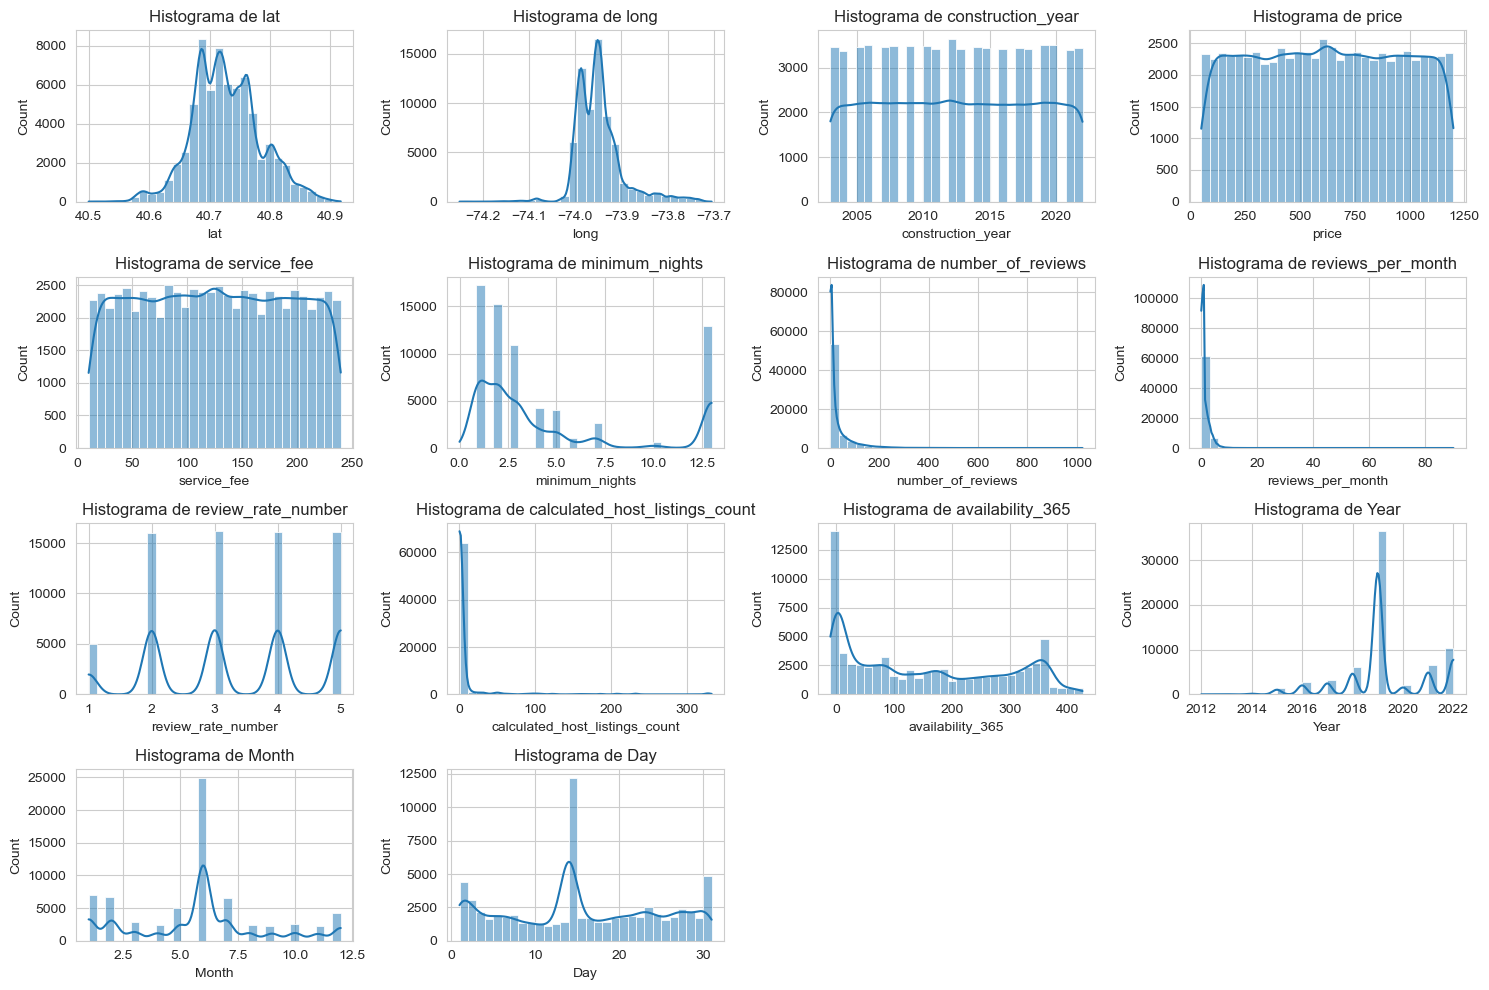

In [7]:
# Histogramas para variables numéricas
num_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura si es necesario
for i, col in enumerate(num_cols, 1):
    if i > 14:  # Limita a 9 gráficos
        break
    plt.subplot(4, 4, i)  # 3 filas, 3 columnas
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()


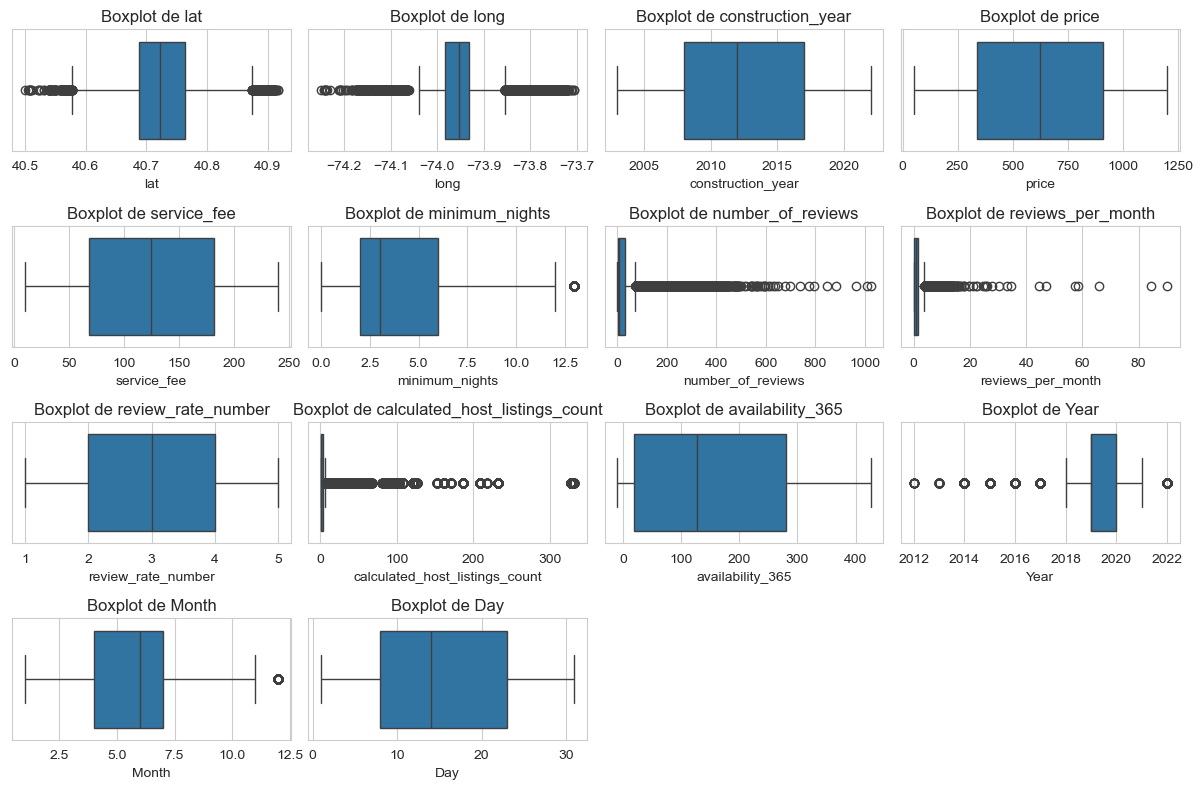

In [8]:
# Boxplots para detectar outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [9]:
# Obtener las columnas de tipo 'object' (que suelen ser las categóricas)
categorical_cols = df.select_dtypes(include=['object']).columns

print("Columnas categóricas:")
print(categorical_cols)

Columnas categóricas:
Index(['host_identity_verified', 'neighbourhood_group', 'neighbourhood',
       'cancellation_policy', 'room_type'],
      dtype='object')


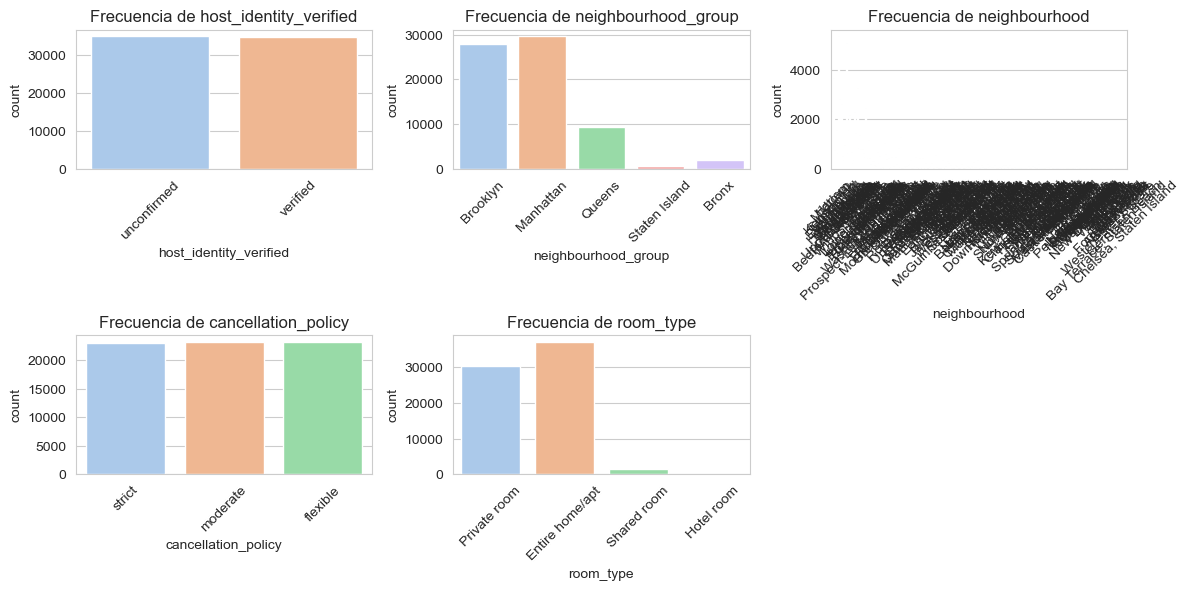

In [10]:
# Countplots para variables categóricas

cat_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Análisis Bivariante
#### Incluye scatterplots y análisis entre pares de variables

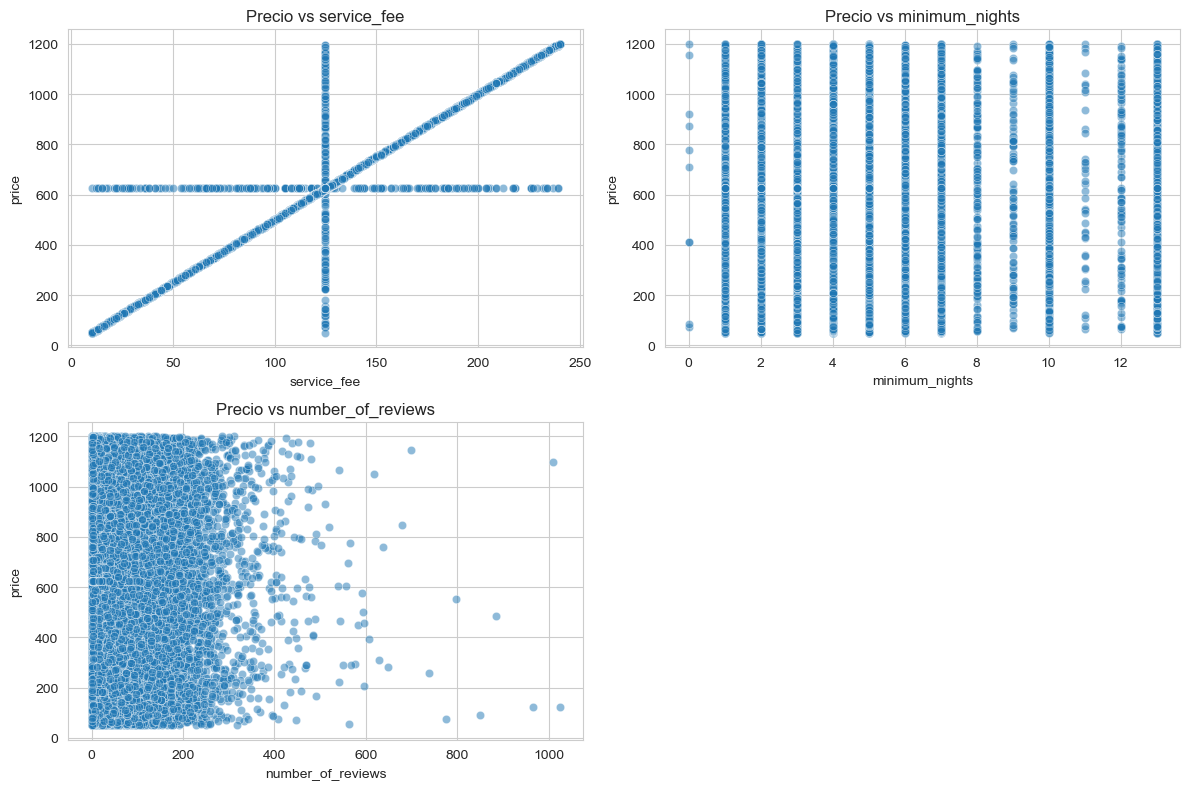

In [11]:
# Relación entre precio y otras variables numéricas

plt.figure(figsize=(12, 8))
for i, col in enumerate(['service_fee', 'minimum_nights', 'number_of_reviews'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['price'], alpha=0.5)
    plt.title(f'Precio vs {col}')
plt.tight_layout()
plt.show()


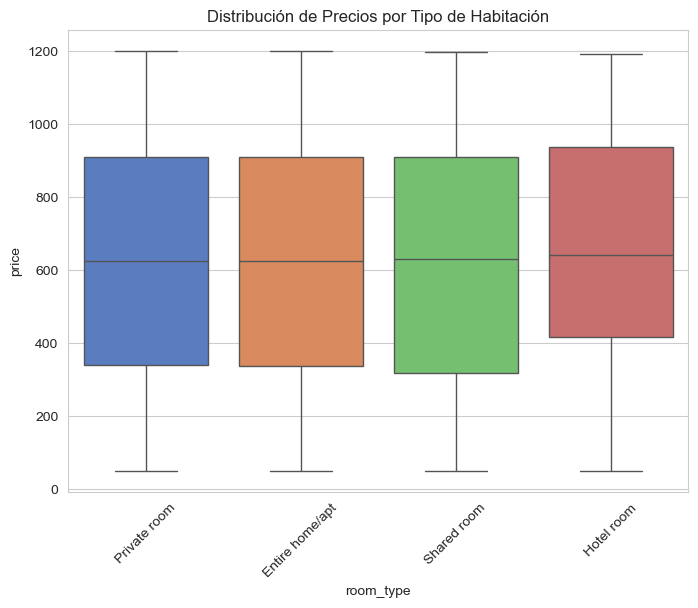

In [12]:
# Boxplot de precio por tipo de habitación

plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df, palette="muted")
plt.title('Distribución de Precios por Tipo de Habitación')
plt.xticks(rotation=45)
plt.show()


#### Análisis Multivariante
#### Incluye heatmaps y pairplots.

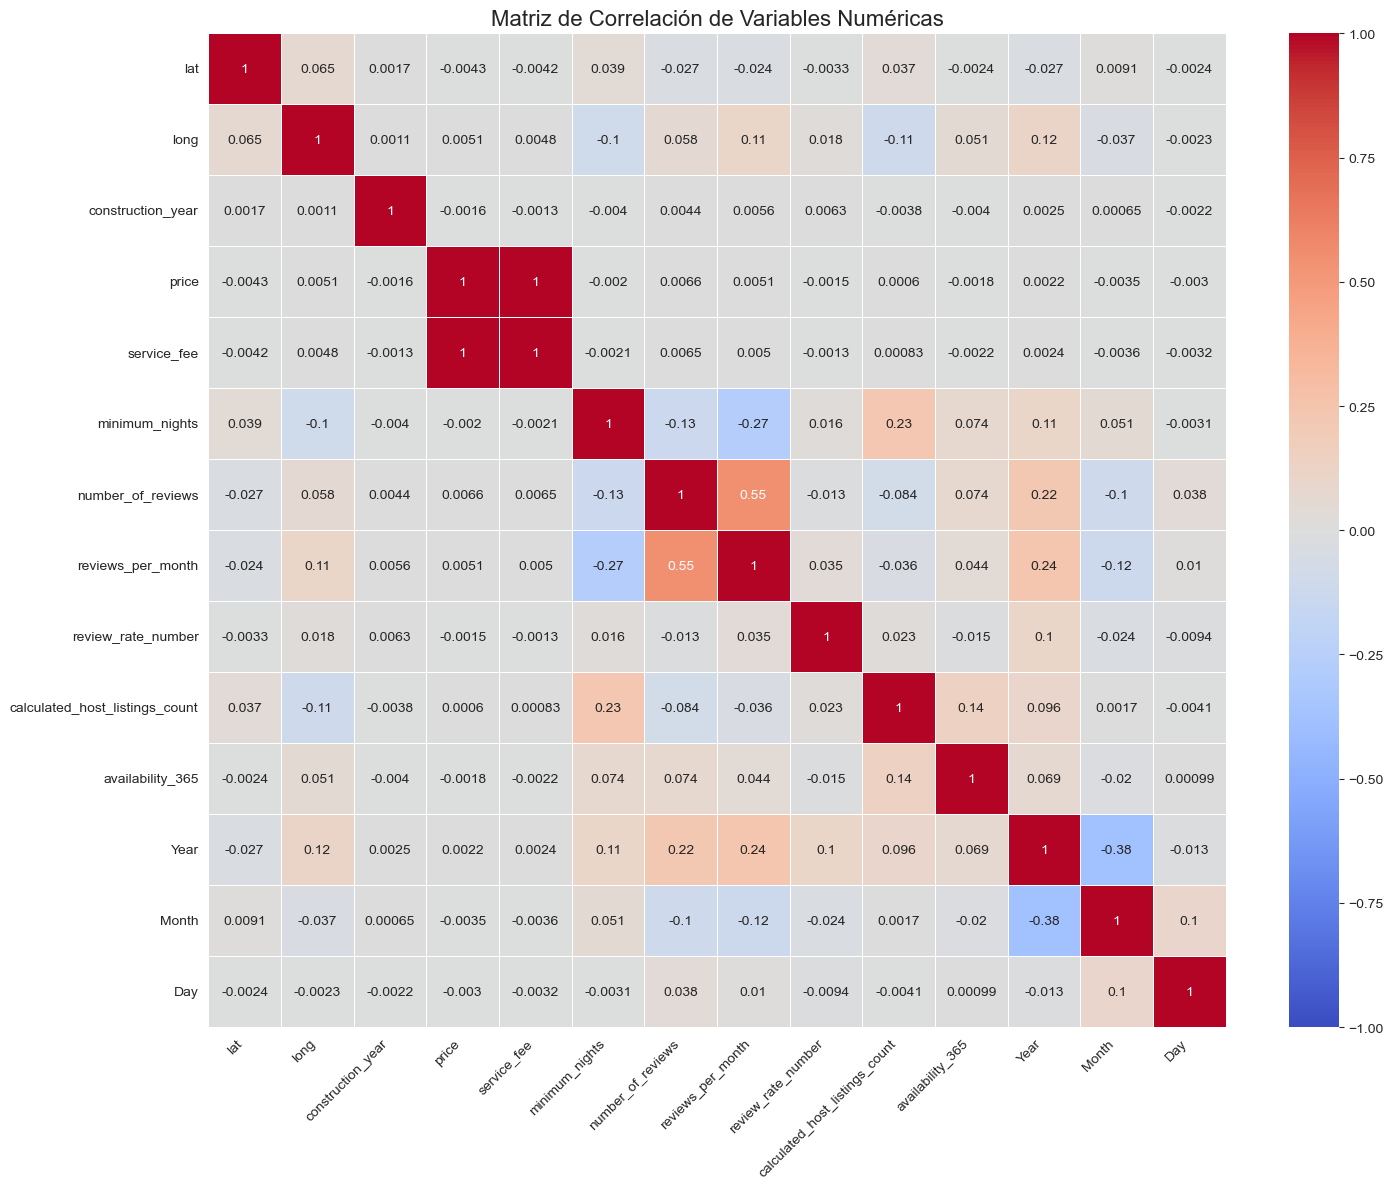

In [13]:
# Matriz de correlación y heatmap

plt.figure(figsize=(15, 12))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10}, vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<Figure size 1200x1000 with 0 Axes>

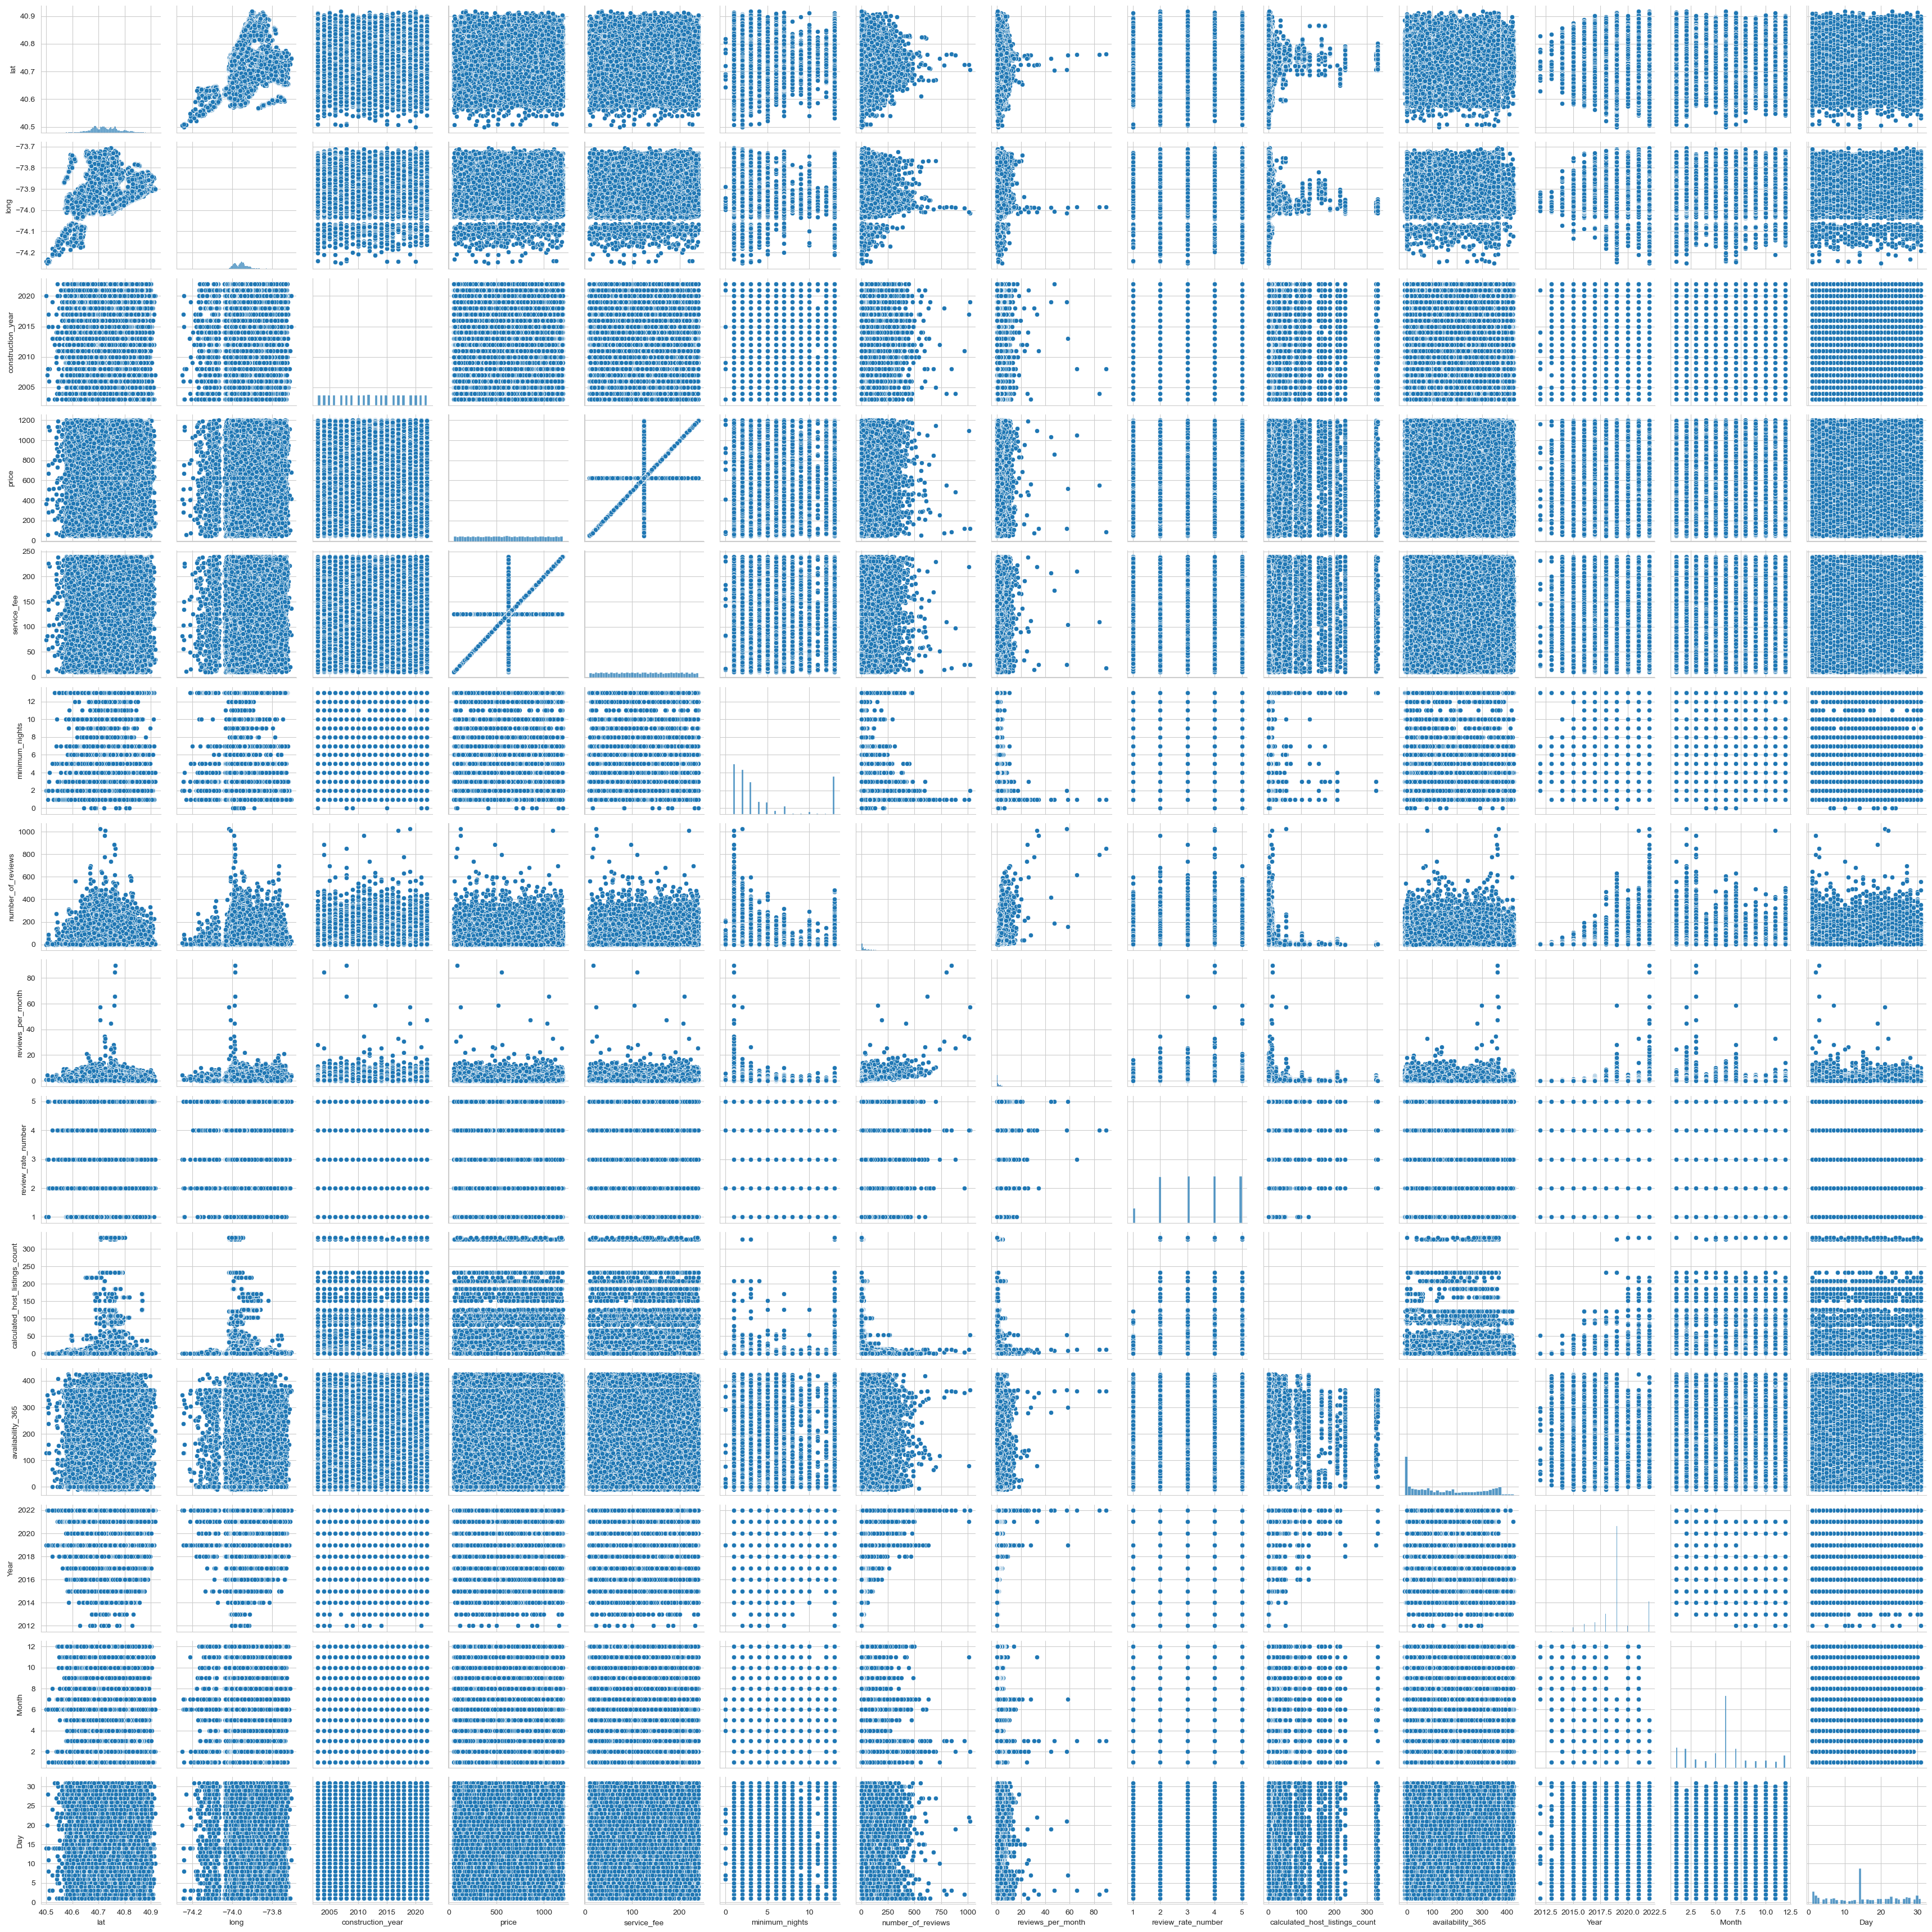

In [14]:
# Pairplot para ver relaciones entre variables

plt.figure(figsize=(12, 10))

sns.pairplot(df[num_cols], palette="coolwarm")  # pairplot de las columnas numéricas
plt.show()



In [15]:
# Información General del DataFrame

print("Información del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          69305 non-null  object 
 1   neighbourhood_group             69305 non-null  object 
 2   neighbourhood                   69305 non-null  object 
 3   lat                             69305 non-null  float64
 4   long                            69305 non-null  float64
 5   instant_bookable                69305 non-null  bool   
 6   cancellation_policy             69305 non-null  object 
 7   room_type                       69305 non-null  object 
 8   construction_year               69305 non-null  float64
 9   price                           69305 non-null  float64
 10  service_fee                     69305 non-null  float64
 11  minimum_nights                  69305 non-null  float64
 12  numbe

In [16]:
# Resumen Estadístico de Variables Numéricas

print("\nResumen Estadístico:")
print(df.describe())



Resumen Estadístico:
                lat          long  construction_year         price  \
count  69305.000000  69305.000000       69305.000000  69305.000000   
mean      40.728070    -73.949036        2012.489503    624.736070   
std        0.055973      0.050470           5.756144    331.158937   
min       40.499790    -74.249840        2003.000000     50.000000   
25%       40.688540    -73.982790        2008.000000    339.000000   
50%       40.722650    -73.954390        2012.000000    624.736070   
75%       40.762730    -73.931380        2017.000000    911.000000   
max       40.916970    -73.705220        2022.000000   1200.000000   

        service_fee  minimum_nights  number_of_reviews  reviews_per_month  \
count  69305.000000    69305.000000       69305.000000       69305.000000   
mean     124.894026        4.620330          28.003896           1.301503   
std       66.222794        4.356887          52.035180           1.659188   
min       10.000000        0.000000    

In [17]:
# Incluir también variables categóricas:

print("\nResumen Estadístico (Incluyendo Categóricas):")
print(df.describe(include='all'))



Resumen Estadístico (Incluyendo Categóricas):
       host_identity_verified neighbourhood_group       neighbourhood  \
count                   69305               69305               69305   
unique                      2                   5                 239   
top               unconfirmed           Manhattan  Bedford-Stuyvesant   
freq                    34779               29587                5331   
mean                      NaN                 NaN                 NaN   
std                       NaN                 NaN                 NaN   
min                       NaN                 NaN                 NaN   
25%                       NaN                 NaN                 NaN   
50%                       NaN                 NaN                 NaN   
75%                       NaN                 NaN                 NaN   
max                       NaN                 NaN                 NaN   

                 lat          long instant_bookable cancellation_policy  \
c

In [18]:
# Tipos de Datos de Cada Columna

print("\nTipos de Datos:")
print(df.dtypes)



Tipos de Datos:
host_identity_verified             object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                     bool
cancellation_policy                object
room_type                          object
construction_year                 float64
price                             float64
service_fee                       float64
minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  float64
Year                                int32
Month                               int32
Day                                 int32
dtype: object


In [19]:
# Cantidad de Valores Únicos en Cada Columna

print("\nValores Únicos por Columna:")
print(df.nunique())



Valores Únicos por Columna:
host_identity_verified                2
neighbourhood_group                   5
neighbourhood                       239
lat                               21998
long                              17780
instant_bookable                      2
cancellation_policy                   3
room_type                             4
construction_year                    20
price                              1152
service_fee                         232
minimum_nights                       14
number_of_reviews                   476
reviews_per_month                  1016
review_rate_number                    5
calculated_host_listings_count       78
availability_365                    437
Year                                 11
Month                                12
Day                                  31
dtype: int64


In [20]:
# Detección de Valores Nulos

print("\nValores Nulos por Columna:")
print(df.isnull().sum())



Valores Nulos por Columna:
host_identity_verified            0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
Year                              0
Month                             0
Day                               0
dtype: int64


#### Evaluar Modelos sin Preprocesamiento

In [21]:
# Función para cargar y limpiar los datos
def cargar_datos(df):
    X = df.drop(columns=['price'])  # Características
    y = df['price']  # Variable objetivo
    
    return X, y

# Función para codificar variables categóricas
def codificar_datos(X):
    return pd.get_dummies(X, drop_first=True)

# Función para dividir datos en entrenamiento y prueba
def dividir_datos(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Función para entrenar y evaluar modelos
def entrenar_evaluar_modelos(X_train, X_test, y_train, y_test):
    models = {
        'LinearRegression': LinearRegression(),
        'KNN': KNeighborsRegressor(),
        'SVR': SVR(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42)
    }

    df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesamiento', 'R2', 'MAE', 'RMSE', 'MAPE'])

    for model_name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            df_resultados.loc[len(df_resultados)] = [
                model_name, "Sin preprocesado",
                r2_score(y_test, y_pred),
                mean_absolute_error(y_test, y_pred),
                mean_squared_error(y_test, y_pred, squared=False),  # RMSE
                mean_absolute_percentage_error(y_test, y_pred)
            ]
        except Exception as e:
            print(f"Error con {model_name}: {e}")

    return df_resultados.sort_values('R2', ascending=False)



In [22]:
# Cargar datos y limpiar
X, y = cargar_datos(df)


In [23]:
# Codificar datos categóricos
X = codificar_datos(X)


In [24]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = dividir_datos(X, y)



In [25]:
# Entrenar y evaluar modelos
df_resultados_sin = entrenar_evaluar_modelos(X_train, X_test, y_train, y_test)


In [26]:
# Mostrar resultados
print(df_resultados_sin)


             Modelo  Preprocesamiento            R2            MAE  \
4      RandomForest  Sin preprocesado  9.929429e-01       4.003686   
1               KNN  Sin preprocesado  9.912648e-01      12.246792   
3      DecisionTree  Sin preprocesado  9.887081e-01       4.732532   
2               SVR  Sin preprocesado  2.836244e-01     241.666844   
0  LinearRegression  Sin preprocesado -2.577254e+10  530453.511938   

           RMSE         MAPE  
4  2.778127e+01     0.010719  
1  3.090834e+01     0.035014  
3  3.514164e+01     0.012940  
2  2.799041e+02     0.862142  
0  5.309058e+07  1146.661128  


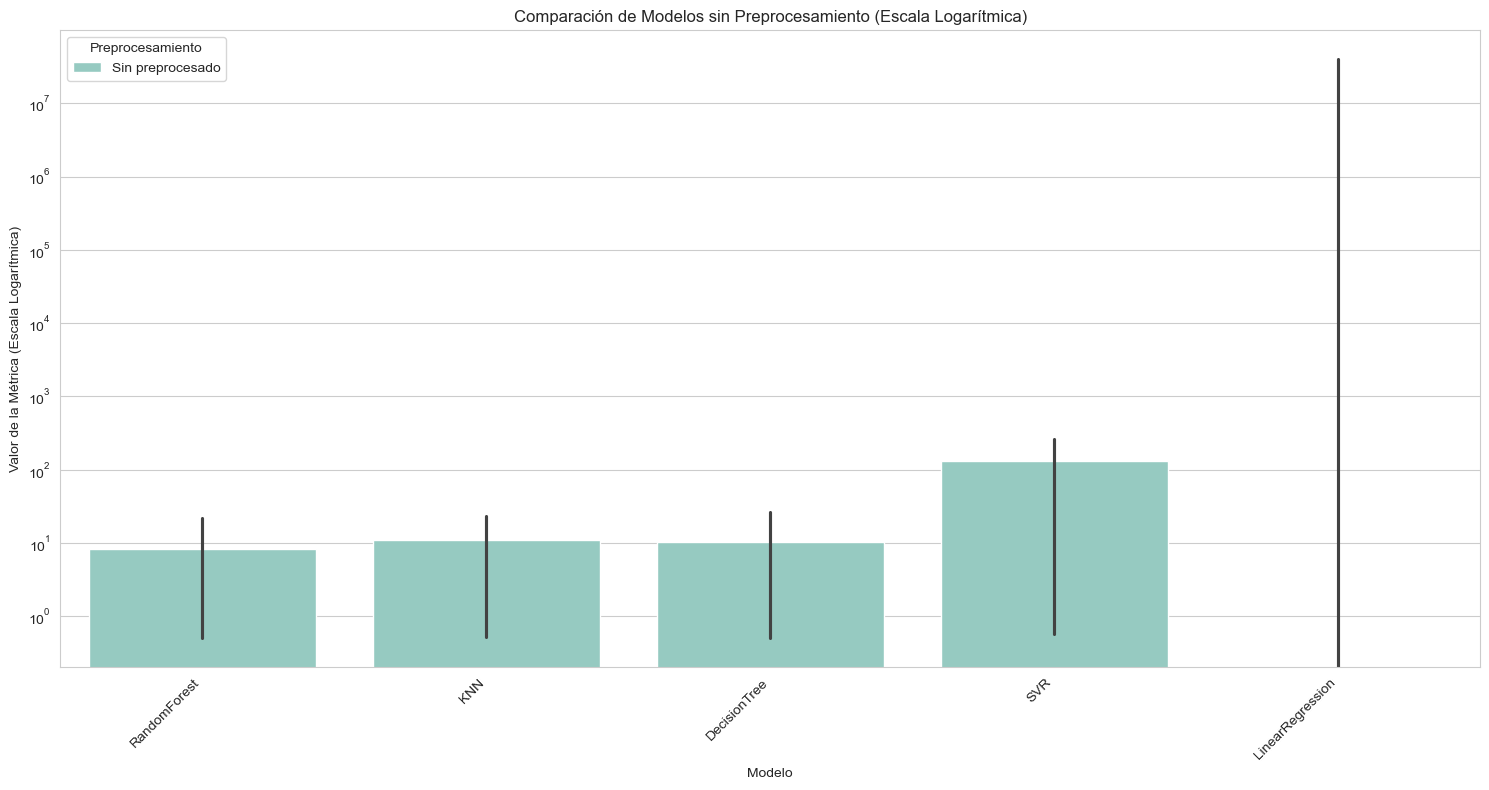

In [27]:
# Convertir a formato largo para mejor visualización
df_long = df_resultados_sin.melt(id_vars=["Modelo", "Preprocesamiento"], var_name="Métrica", value_name="Valor")

# Crear el gráfico barplot con Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_long, x="Modelo", y="Valor", hue="Preprocesamiento", palette="Set3")

# Escala logarítmica para el eje Y
ax.set_yscale('log')  # Aplica la escala logarítmica

plt.title("Comparación de Modelos sin Preprocesamiento (Escala Logarítmica)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Modelo")
plt.ylabel("Valor de la Métrica (Escala Logarítmica)")  # Actualiza la etiqueta del eje Y
plt.tight_layout()
plt.show()

### Preprocesados. Regresión

#### Cargar Datos y Dividir en Entrenamiento/Test
##### Carga los datos y los divide en entrenamiento (80%) y prueba (20%).

In [28]:
# Dividir características y variable objetivo
X = df.drop(columns=['price'])  # 'price' es la variable objetivo
y = df['price']

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Tamaño X_train: {X_train.shape}, X_test: {X_test.shape}")


Tamaño X_train: (55444, 19), X_test: (13861, 19)


#### Preprocesamiento de Datos
##### Convierte todas las variables en números y las escala correctamente.

In [29]:
# Identificar columnas numéricas y categóricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocesador para variables numéricas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Rellenar valores nulos
    ('scaler', StandardScaler()),  # Escalar valores
    ('transformer', PowerTransformer())  # Normalizar distribución
])

# Preprocesador para variables categóricas
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Rellenar valores nulos
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Convertir a numérico
])

# Combinar transformaciones
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Aplicar preprocesamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(f"Tamaño después del preprocesamiento: {X_train_preprocessed.shape}")



Tamaño después del preprocesamiento: (55444, 260)


#### Clustering y Siluetas

Coeficiente de Silueta: 0.0914


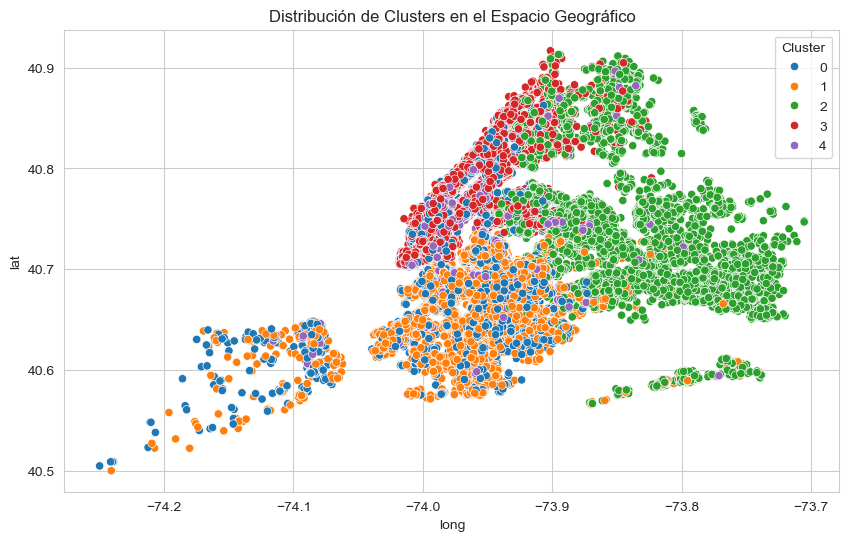

In [30]:
# Aplicar KMeans para clustering
num_clusters = 5 
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

# Ajustar el modelo con los datos preprocesados (sin reducir dimensionalidad aún)
kmeans.fit(X_train_preprocessed)

# Agregar la columna de cluster a los conjuntos de datos
X_train_clustered = X_train.copy()
X_test_clustered = X_test.copy()
X_train_clustered['cluster'] = kmeans.labels_
X_test_clustered['cluster'] = kmeans.predict(X_test_preprocessed)

# Calcular la métrica de silueta
silueta = silhouette_score(X_train_preprocessed, kmeans.labels_)
print(f"Coeficiente de Silueta: {silueta:.4f}")

# Visualización con scatterplot coloreado por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_clustered['long'], y=X_train_clustered['lat'], hue=X_train_clustered['cluster'], palette='tab10')
plt.title('Distribución de Clusters en el Espacio Geográfico')
plt.xlabel('long')
plt.ylabel('lat')
plt.legend(title='Cluster')
plt.show()


#### Reducir Dimensionalidad con SelectKBest
##### El dataset tiene muchas columnas 260 después del OneHotEncoder, puede ayudar reducir dimensiones con SelectKBest.

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression

k_best = SelectKBest(score_func=f_regression, k=20)  # Selecciona las 20 mejores
X_train_reduced = k_best.fit_transform(X_train_preprocessed, y_train)
X_test_reduced = k_best.transform(X_test_preprocessed)

print(f"Tamaño después de SelectKBest: {X_train_reduced.shape}")



Tamaño después de SelectKBest: (55444, 20)


#### Entrenar Modelos y Evaluarlos
##### Entrena los modelos, predice en X_test, y evalúa con métricas (R², MAE, etc.).

In [32]:
# Definir modelos
models = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

# Evaluar modelos
df_resultados = pd.DataFrame(columns=['Modelo', 'Preprocesamiento', 'R2', 'MAE', 'RMSE', 'MAPE'])

for model_name, model in models.items():
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)

    df_resultados.loc[len(df_resultados)] = [
        model_name, "Con preprocesado",
        r2_score(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred, squared=False),  # RMSE
        mean_absolute_percentage_error(y_test, y_pred)
    ]

print(df_resultados.sort_values('R2', ascending=False))



             Modelo  Preprocesamiento        R2       MAE       RMSE      MAPE
0  LinearRegression  Con preprocesado  0.994213  3.057723  25.157914  0.007905
4      RandomForest  Con preprocesado  0.994190  3.275022  25.206529  0.008576
3      DecisionTree  Con preprocesado  0.994184  3.272239  25.220532  0.008527
1               KNN  Con preprocesado  0.993121  4.374348  27.428372  0.009779
2               SVR  Con preprocesado  0.989970  6.957616  33.120523  0.027269


#### GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pandas as pd

# Definir el modelo de RandomForest
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros a evaluar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                              scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo con la búsqueda de hiperparámetros
rf_grid_search.fit(X_train_reduced, y_train)

# Obtener el mejor modelo
best_rf_model = rf_grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_best_rf = best_rf_model.predict(X_test_reduced)

# Evaluar el mejor modelo
best_rf_results = {
    'Modelo': 'RandomForest (Optimizado)',
    'Preprocesamiento': 'Con preprocesado Grid',
    'R2': r2_score(y_test, y_pred_best_rf),
    'MAE': mean_absolute_error(y_test, y_pred_best_rf),
    'RMSE': mean_squared_error(y_test, y_pred_best_rf, squared=False),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred_best_rf)
}

# Convertir best_rf_results en DataFrame y concatenarlo
df_resultados = pd.concat([df_resultados, pd.DataFrame([best_rf_results])], ignore_index=True)

# Mostrar resultados actualizados
print(df_resultados.sort_values('R2', ascending=False))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
                      Modelo       Preprocesamiento        R2       MAE  \
5  RandomForest (Optimizado)  Con preprocesado Grid  0.994214  3.252160   
0           LinearRegression       Con preprocesado  0.994213  3.057723   
4               RandomForest       Con preprocesado  0.994190  3.275022   
3               DecisionTree       Con preprocesado  0.994184  3.272239   
1                        KNN       Con preprocesado  0.993121  4.374348   
2                        SVR       Con preprocesado  0.989970  6.957616   

        RMSE      MAPE  
5  25.155416  0.008542  
0  25.157914  0.007905  
4  25.206529  0.008576  
3  25.220532  0.008527  
1  27.428372  0.009779  
2  33.120523  0.027269  


In [34]:
# Obtener el mejor modelo de df_resultados
best_model_name = df_resultados.iloc[0]['Modelo']

# Seleccionar el mejor modelo
if best_model_name in models:
    best_model = models[best_model_name]
else:
    best_model = best_rf_model  # Si es 'RandomForest (Optimizado)', usar best_rf_model directamente

# Hacer predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test_reduced)

#### Analizar Resultados
##### Esto te mostrará qué modelo funciona mejor

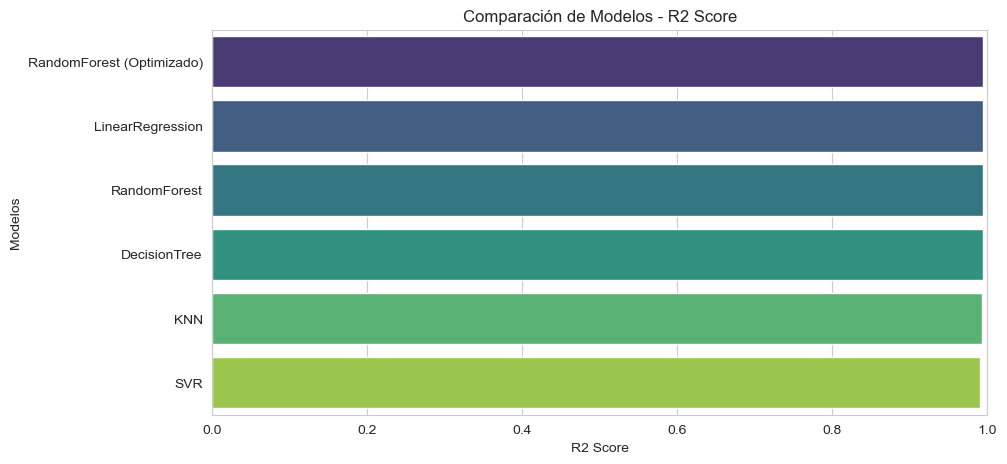

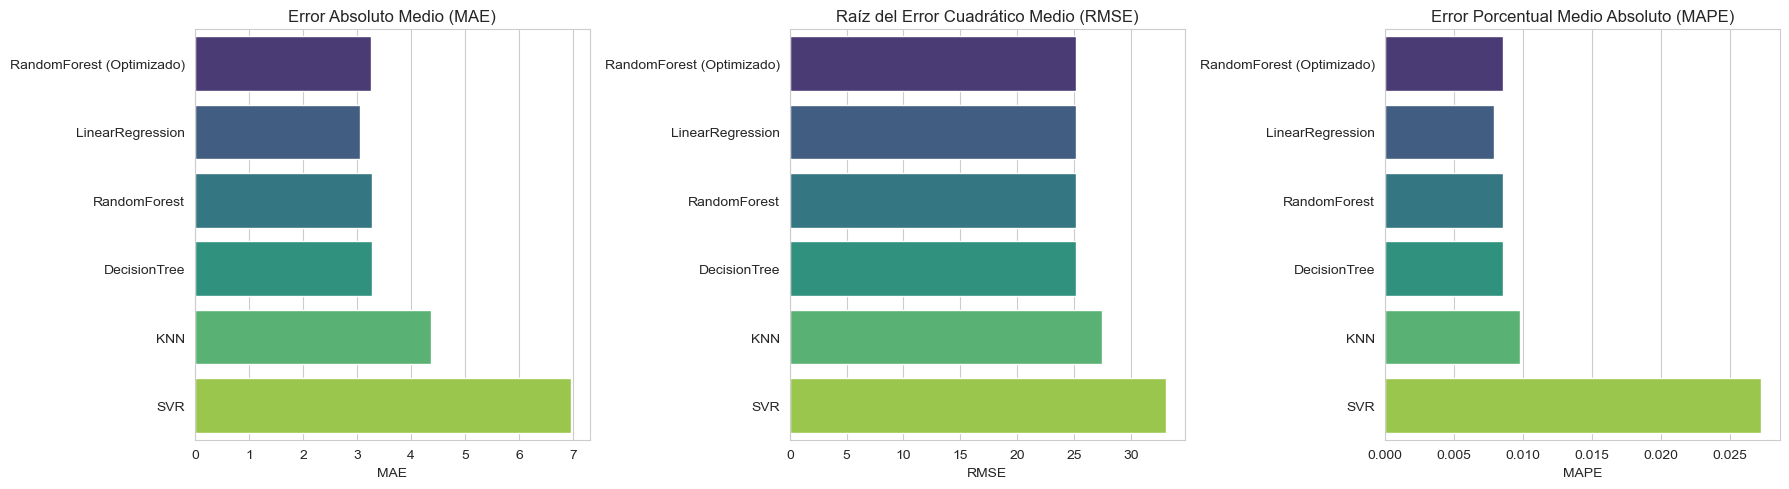

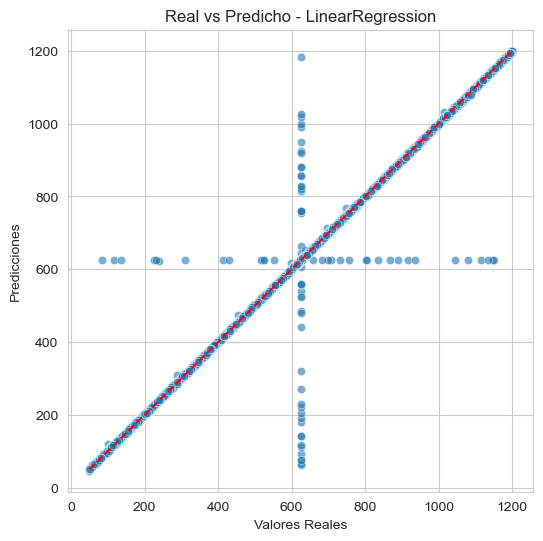

In [35]:
# Ordenar los resultados por R2
df_resultados = df_resultados.sort_values('R2', ascending=False)

# Colores para los gráficos
colors = sns.color_palette('viridis', len(df_resultados))

# --- Gráfico de R² ---
plt.figure(figsize=(10, 5))
sns.barplot(x='R2', y='Modelo', data=df_resultados, palette=colors)
plt.title('Comparación de Modelos - R2 Score')
plt.xlabel('R2 Score')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.show()

# --- Gráficos de errores ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['MAE', 'RMSE', 'MAPE']
titles = ['Error Absoluto Medio (MAE)', 'Raíz del Error Cuadrático Medio (RMSE)', 'Error Porcentual Medio Absoluto (MAPE)']

for i, metric in enumerate(metrics):
    sns.barplot(x=metric, y='Modelo', data=df_resultados, ax=axes[i], palette=colors)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title(f'Real vs Predicho - {best_model_name}')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


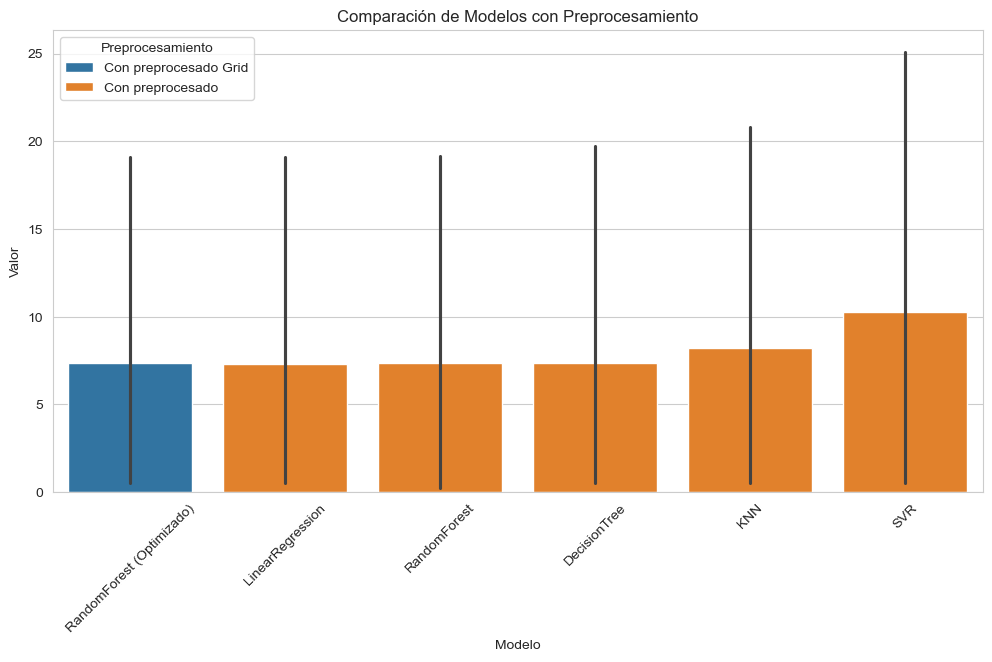

In [36]:
# unir los dos resultados sin y con preprocesamiento
# df_resultados_total = pd.concat([df_resultados_sin, df_resultados], ignore_index=True)

# Convertir a formato largo para mejor visualización
df_long = df_resultados.melt(id_vars=["Modelo", "Preprocesamiento"], var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x="Modelo", y="Valor", hue="Preprocesamiento")
plt.title("Comparación de Modelos con Preprocesamiento")
plt.xticks(rotation=45)
plt.show()


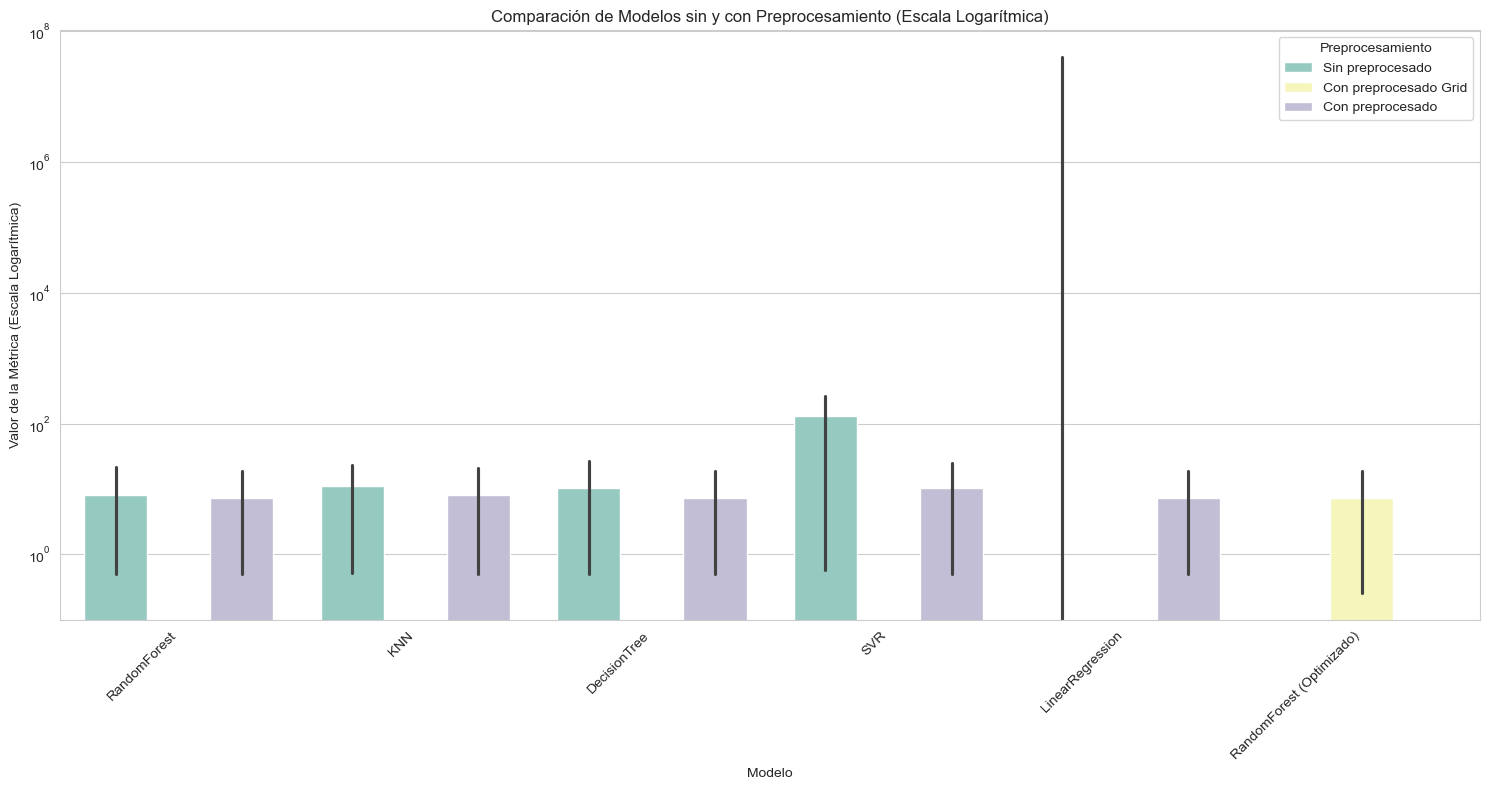

In [37]:
# unir los dos resultados sin y con preprocesamiento
df_resultados_total = pd.concat([df_resultados_sin, df_resultados], ignore_index=True)

# Convertir a formato largo para mejor visualización
df_long = df_resultados_total.melt(id_vars=["Modelo", "Preprocesamiento"], var_name="Métrica", value_name="Valor")

# Crear el gráfico barplot con Seaborn
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_long, x="Modelo", y="Valor", hue="Preprocesamiento", palette="Set3")

# Escala logarítmica para el eje Y
ax.set_yscale('log')  # Aplica la escala logarítmica

plt.title("Comparación de Modelos sin y con Preprocesamiento (Escala Logarítmica)")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Modelo")
plt.ylabel("Valor de la Métrica (Escala Logarítmica)")  # Actualiza la etiqueta del eje Y
plt.tight_layout()
plt.show()

#### Análisis:

#### El gráfico muestra el rendimiento de los modelos de Machine Learning en dos escenarios: con y sin preprocesamiento de los datos. 
#### Se observa que en la mayoría de los modelos, el preprocesamiento mejora el rendimiento (a excepción de SVR y Linear Regression, donde el preprocesamiento no parece tener un #### impacto significativo).

#### El modelo Random Forest (Optimizado) es el que mejor rendimiento presenta en ambos escenarios, superando a todos los demás modelos.

#### El preprocesamiento de los datos puede mejorar significativamente el rendimiento de los modelos de Machine Learning.
#### El modelo Random Forest (Optimizado) es el que mejor rendimiento presenta en este conjunto de datos y tareas.

#### Preprocesado Clasificación Multiclase

In [38]:
# Selección de características y variable objetivo
X = df.drop(columns=["room_type"])
y = df["room_type"]


In [39]:
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [40]:
# Preprocesamiento
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])



In [41]:
# Aplicar PCA
pca = PCA(n_components=10)


LogisticRegression
LogisticRegression Accuracy: 0.5948
                 precision    recall  f1-score   support

Entire home/apt       0.60      0.77      0.68      7442
     Hotel room       0.00      0.00      0.00        23
   Private room       0.58      0.41      0.48      6102
    Shared room       0.00      0.00      0.00       294

       accuracy                           0.59     13861
      macro avg       0.30      0.30      0.29     13861
   weighted avg       0.58      0.59      0.58     13861

--------------------------------------------------


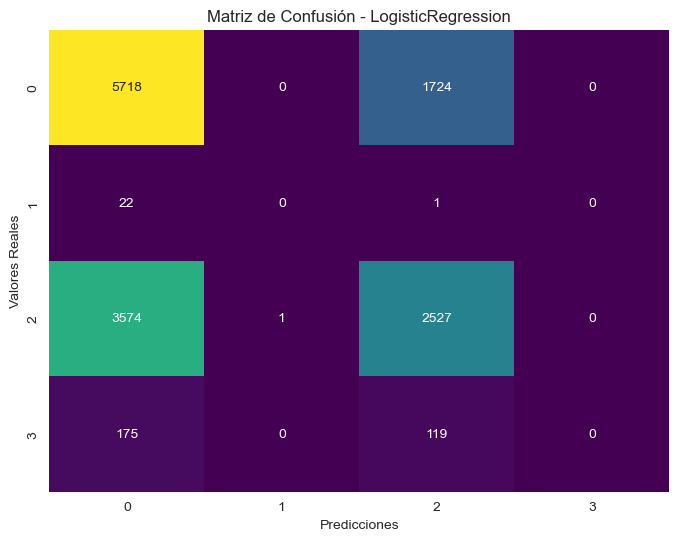

KNeighborsClassifier
KNeighborsClassifier Accuracy: 0.5930
                 precision    recall  f1-score   support

Entire home/apt       0.62      0.68      0.65      7442
     Hotel room       0.33      0.04      0.08        23
   Private room       0.55      0.52      0.54      6102
    Shared room       1.00      0.01      0.01       294

       accuracy                           0.59     13861
      macro avg       0.63      0.31      0.32     13861
   weighted avg       0.60      0.59      0.58     13861

--------------------------------------------------


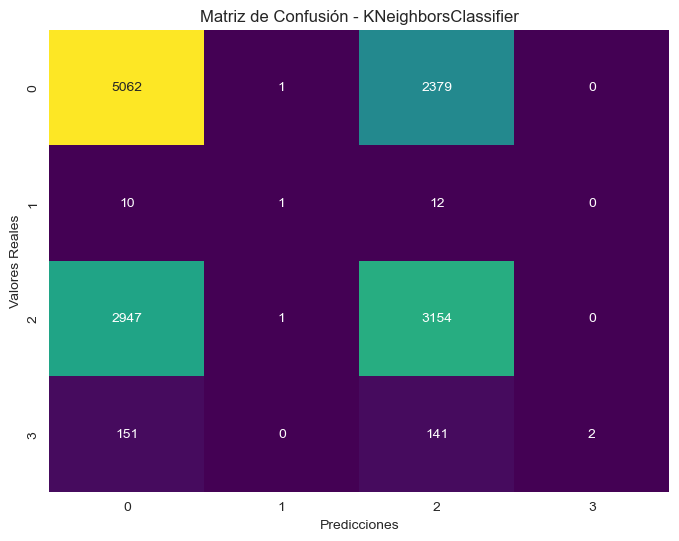

DecisionTreeClassifier
DecisionTreeClassifier Accuracy: 0.5661
                 precision    recall  f1-score   support

Entire home/apt       0.62      0.61      0.62      7442
     Hotel room       0.06      0.04      0.05        23
   Private room       0.53      0.53      0.53      6102
    Shared room       0.07      0.08      0.08       294

       accuracy                           0.57     13861
      macro avg       0.32      0.32      0.32     13861
   weighted avg       0.57      0.57      0.57     13861

--------------------------------------------------


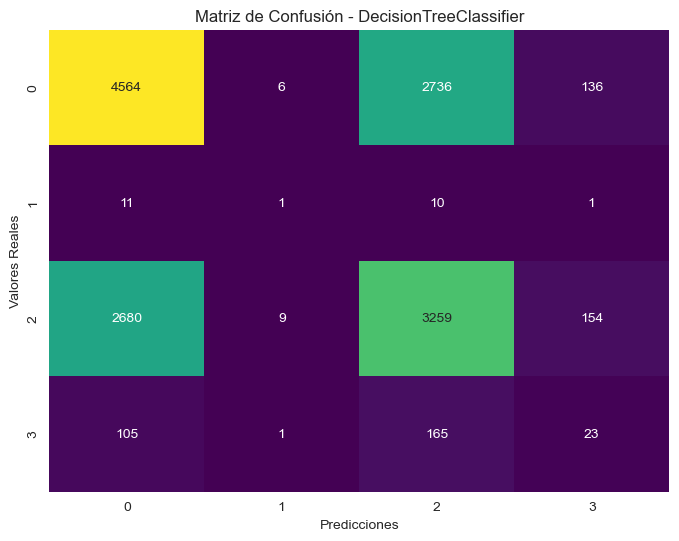

RandomForestClassifier
RandomForestClassifier Accuracy: 0.6471
                 precision    recall  f1-score   support

Entire home/apt       0.67      0.73      0.70      7442
     Hotel room       0.00      0.00      0.00        23
   Private room       0.62      0.58      0.60      6102
    Shared room       1.00      0.02      0.03       294

       accuracy                           0.65     13861
      macro avg       0.57      0.33      0.33     13861
   weighted avg       0.65      0.65      0.64     13861

--------------------------------------------------


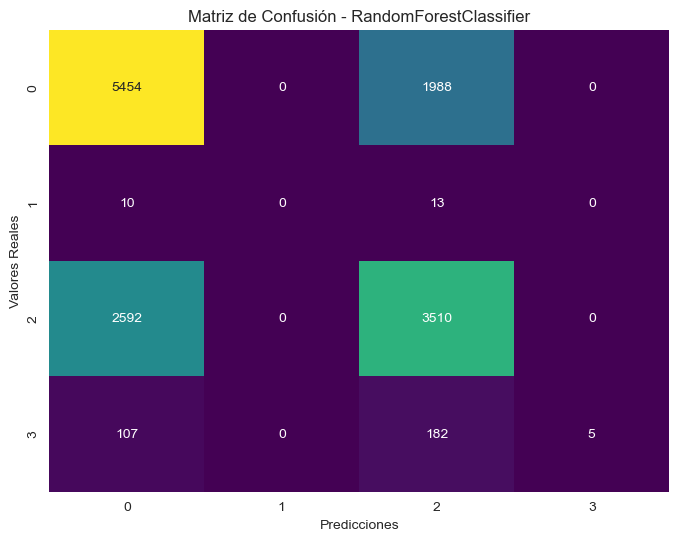

SVC
SVC Accuracy: 0.6395
                 precision    recall  f1-score   support

Entire home/apt       0.65      0.74      0.70      7442
     Hotel room       0.00      0.00      0.00        23
   Private room       0.62      0.54      0.58      6102
    Shared room       0.00      0.00      0.00       294

       accuracy                           0.64     13861
      macro avg       0.32      0.32      0.32     13861
   weighted avg       0.62      0.64      0.63     13861

--------------------------------------------------


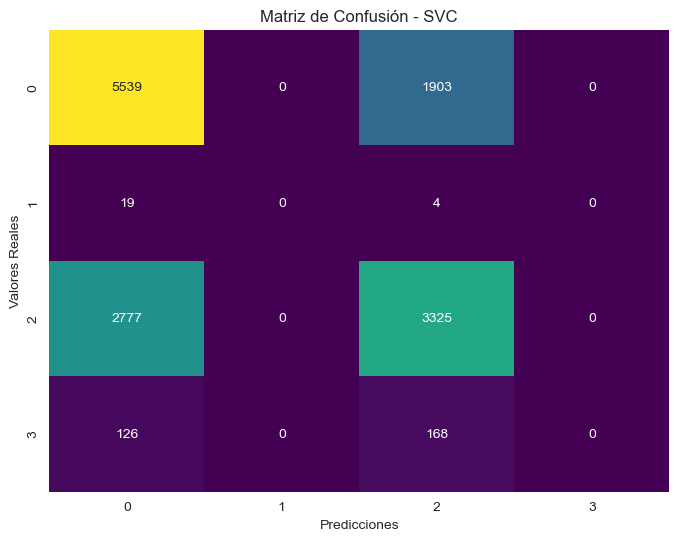

In [42]:
# Entrenamiento y evaluación
def evaluate_models():
    
    # Modelos de clasificación
    models = {
        "LogisticRegression": LogisticRegression(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "SVC": SVC()
    }

    
    
    results = []
    for name, model in models.items():
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("pca", pca),
            ("classifier", model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Si el modelo es de clasificación, calcula accuracy y muestra matriz de confusión
        print(name)
        if name in ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC']:
            accuracy = accuracy_score(y_test, y_pred)
            results.append((name, accuracy))
            print(f"{name} Accuracy: {accuracy:.4f}")
            print(classification_report(y_test, y_pred))
            print("-" * 50)

            # Matriz de Confusión
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
            plt.title(f'Matriz de Confusión - {name}')
            plt.xlabel('Predicciones')
            plt.ylabel('Valores Reales')
            plt.show()

    return results

# Llamar a la función para evaluar los modelos
results = evaluate_models()


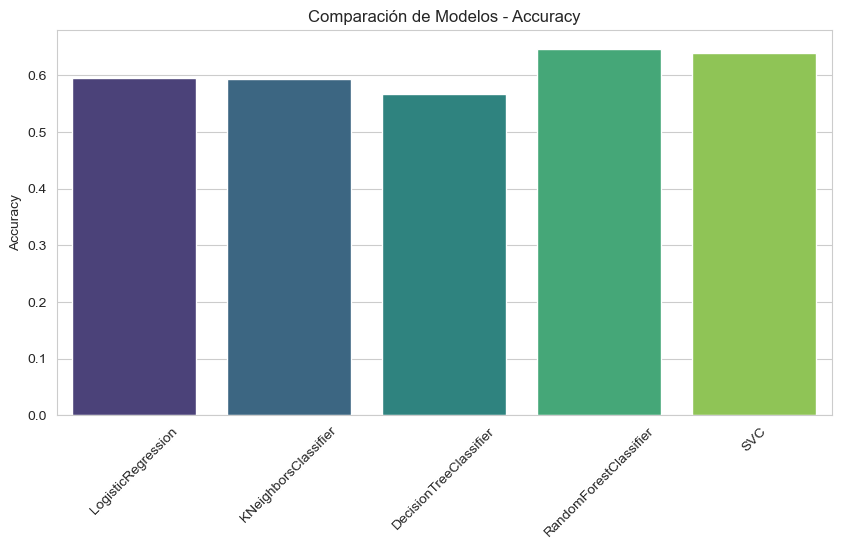

In [43]:
# Visualización de resultados
model_names, accuracies = zip(*results)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_names), y=list(accuracies), palette="viridis")
plt.title("Comparación de Modelos - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


#### Con validación cruzada

LogisticRegression - Accuracy promedio: 0.6164 - Tiempo: 15.69 s
--------------------------------------------------
KNeighborsClassifier - Accuracy promedio: 0.5935 - Tiempo: 125.53 s
--------------------------------------------------
DecisionTreeClassifier - Accuracy promedio: 0.6280 - Tiempo: 20.03 s
--------------------------------------------------
RandomForestClassifier - Accuracy promedio: 0.7032 - Tiempo: 332.51 s
--------------------------------------------------
SVC - Accuracy promedio: 0.6542 - Tiempo: 1071.83 s
--------------------------------------------------


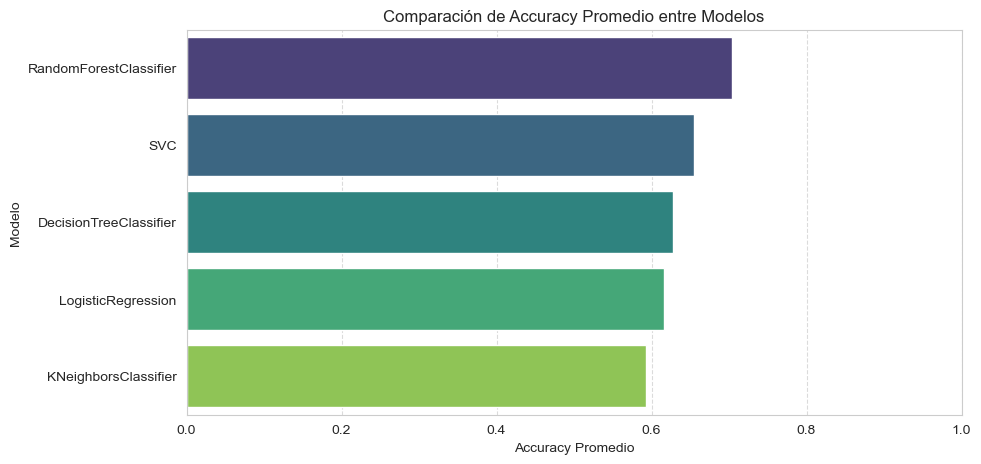

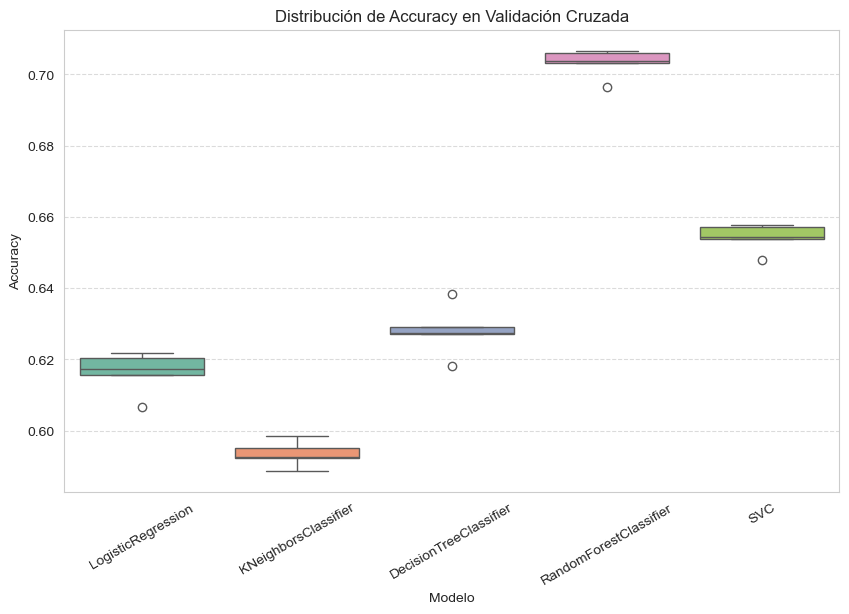

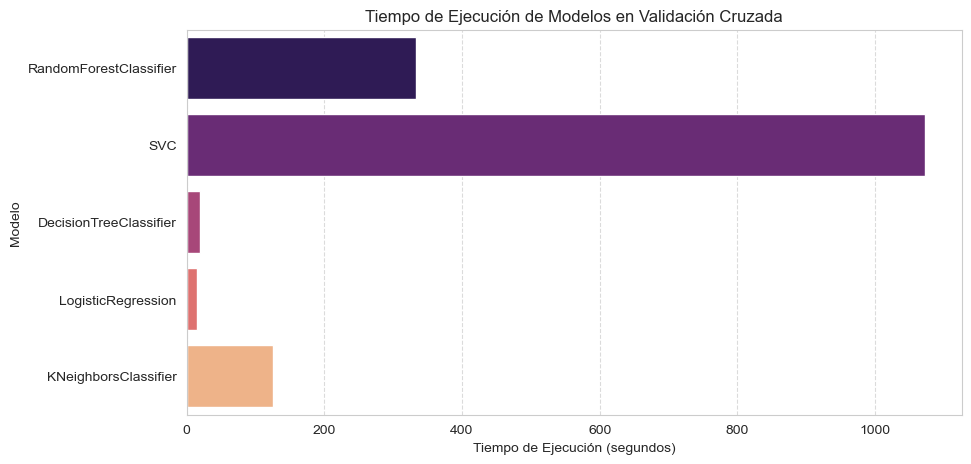

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold

import time


# Selección de características y variable objetivo
X = df.drop(columns=["room_type"])
y = df["room_type"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identificar características numéricas y categóricas
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Pipelines de preprocesamiento
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Definir modelos
models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC()
}

# Codificar la variable objetivo
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Validación cruzada con 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Función para evaluar modelos con validación cruzada y visualizar resultados
def evaluate_models_cv():
    results = []
    scores_dict = {}
    time_dict = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
        
        try:
            start_time = time.time()
            scores = cross_val_score(pipeline, X_train, y_train_enc, cv=cv, scoring='accuracy', error_score='raise')
            elapsed_time = time.time() - start_time
            
            mean_acc = np.mean(scores)
            results.append((name, mean_acc, elapsed_time))
            
            scores_dict[name] = scores  # Guardamos las precisiones individuales
            time_dict[name] = elapsed_time  # Guardamos el tiempo de ejecución
            
            print(f"{name} - Accuracy promedio: {mean_acc:.4f} - Tiempo: {elapsed_time:.2f} s")
        except Exception as e:
            print(f"Error en {name}: {e}")

        print("-" * 50)
    
    return results, scores_dict, time_dict

# Ejecutar evaluación con validación cruzada
results_cv, scores_cv, times_cv = evaluate_models_cv()

# Convertir resultados en DataFrame para graficar
df_results = pd.DataFrame(results_cv, columns=["Modelo", "Accuracy Promedio", "Tiempo"])
df_results = df_results.sort_values(by="Accuracy Promedio", ascending=False)

# **Gráfico de barras: Accuracy promedio por modelo**
plt.figure(figsize=(10, 5))
sns.barplot(x="Accuracy Promedio", y="Modelo", data=df_results, palette="viridis")
plt.xlabel("Accuracy Promedio")
plt.ylabel("Modelo")
plt.title("Comparación de Accuracy Promedio entre Modelos")
plt.xlim(0, 1)  # Accuracy va de 0 a 1
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# **Boxplot: Distribución de accuracy en validación cruzada**
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(scores_cv), palette="Set2")
plt.xlabel("Modelo")
plt.ylabel("Accuracy")
plt.title("Distribución de Accuracy en Validación Cruzada")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# **Gráfico de barras: Tiempo de ejecución por modelo**
plt.figure(figsize=(10, 5))
sns.barplot(x="Tiempo", y="Modelo", data=df_results, palette="magma")
plt.xlabel("Tiempo de Ejecución (segundos)")
plt.ylabel("Modelo")
plt.title("Tiempo de Ejecución de Modelos en Validación Cruzada")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()




## Procesado de regresión y clasificación multiclase sin usar pipelines. De forma manual

#### Cargar y Preprocesar los Datos

In [45]:
df = pd.read_csv("airbnb_nyc_clean.CSV", sep=',', encoding='latin-1')

# Eliminar las columnas innecesarias
columnas_a_eliminar = ['id', 'name', 'host_id', 'host_name', 'house_rules']
df = df.drop(columns=columnas_a_eliminar)

# Descomponer la columna 'last_review' en 'Year', 'Month', 'Day'
df['last_review'] = pd.to_datetime(df['last_review'])
df['Year'] = df['last_review'].dt.year
df['Month'] = df['last_review'].dt.month
df['Day'] = df['last_review'].dt.day
df = df.drop(columns=['last_review'])

# Ver las primeras filas
df.head(3)


host_identity_verified neighbourhood_group neighbourhood       lat  \
0            unconfirmed            Brooklyn    Kensington  40.64749   
1               verified           Manhattan       Midtown  40.75362   
2            unconfirmed           Manhattan        Harlem  40.80902   

       long  instant_bookable cancellation_policy        room_type  \
0 -73.97237             False              strict     Private room   
1 -73.98377             False            moderate  Entire home/apt   
2 -73.94190              True            flexible     Private room   

   construction_year  price  service_fee  minimum_nights  number_of_reviews  \
0             2020.0  966.0        193.0            10.0                9.0   
1             2007.0  142.0         28.0            13.0               45.0   
2             2005.0  620.0        124.0             3.0                0.0   

   reviews_per_month  review_rate_number  calculated_host_listings_count  \
0               0.21                 4.0                             6.0   
1               0.38                 4.0                             2.0   
2               0.79                 5.0                             1.0   

   availability_365  Year  Month  Day  
0             286.0  2021     10   19  
1             228.0  2022      5   21  
2             352.0  2019      6   14

In [46]:
# Preprocesamiento de Variables Categóricas
# Obtener columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Usar pd.get_dummies para codificar las variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Ver las primeras filas después de codificar
df_encoded.head(3)


lat      long  instant_bookable  construction_year  price  \
0  40.64749 -73.97237             False             2020.0  966.0   
1  40.75362 -73.98377             False             2007.0  142.0   
2  40.80902 -73.94190              True             2005.0  620.0   

   service_fee  minimum_nights  number_of_reviews  reviews_per_month  \
0        193.0            10.0                9.0               0.21   
1         28.0            13.0               45.0               0.38   
2        124.0             3.0                0.0               0.79   

   review_rate_number  ...  neighbourhood_Windsor Terrace  \
0                 4.0  ...                          False   
1                 4.0  ...                          False   
2                 5.0  ...                          False   

   neighbourhood_Woodhaven  neighbourhood_Woodlawn  neighbourhood_Woodrow  \
0                    False                   False                  False   
1                    False                   False                  False   
2                    False                   False                  False   

   neighbourhood_Woodside  cancellation_policy_moderate  \
0                   False                         False   
1                   False                          True   
2                   False                         False   

   cancellation_policy_strict  room_type_Hotel room  room_type_Private room  \
0                        True                 False                    True   
1                       False                 False                   False   
2                       False                 False                    True   

   room_type_Shared room  
0                  False  
1                  False  
2                  False  

[3 rows x 263 columns]

In [47]:
# Preprocesamiento de Variables Numéricas
# Identificar variables numéricas
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Imputación de valores nulos con la mediana
imputer = SimpleImputer(strategy='median')
df_encoded[numeric_cols] = imputer.fit_transform(df_encoded[numeric_cols])

# Escalado de variables numéricas
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Ver las primeras filas después del preprocesamiento
df_encoded.head(3)


lat      long  instant_bookable  construction_year     price  \
0 -1.439649 -0.462349             False           1.304789  1.030521   
1  0.456468 -0.688228             False          -0.953684 -1.457728   
2  1.446243  0.141383              True          -1.301141 -0.014302   

   service_fee  minimum_nights  number_of_reviews  reviews_per_month  \
0     1.028444        1.234760          -0.365215          -0.657858   
1    -1.463163        1.923330           0.326630          -0.555398   
2    -0.013500       -0.371904          -0.538176          -0.308287   

   review_rate_number  ...  neighbourhood_Windsor Terrace  \
0            0.540212  ...                          False   
1            0.540212  ...                          False   
2            1.336556  ...                          False   

   neighbourhood_Woodhaven  neighbourhood_Woodlawn  neighbourhood_Woodrow  \
0                    False                   False                  False   
1                    False                   False                  False   
2                    False                   False                  False   

   neighbourhood_Woodside  cancellation_policy_moderate  \
0                   False                         False   
1                   False                          True   
2                   False                         False   

   cancellation_policy_strict  room_type_Hotel room  room_type_Private room  \
0                        True                 False                    True   
1                       False                 False                   False   
2                       False                 False                    True   

   room_type_Shared room  
0                  False  
1                  False  
2                  False  

[3 rows x 263 columns]

#### División de Datos (Entrenamiento y Prueba)

In [48]:
# Dividir en características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño X_train: {X_train.shape}, X_test: {X_test.shape}")


Tamaño X_train: (55444, 262), X_test: (13861, 262)


#### Entrenamiento de Modelos de Regresión (sin Pipeline)

In [49]:
# Modelos de regresión
models = {
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

# Evaluar los modelos
df_resultados = pd.DataFrame(columns=['Modelo', 'R2', 'MAE', 'RMSE', 'MAPE'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    df_resultados.loc[len(df_resultados)] = [
        model_name,
        r2_score(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred, squared=False),  # RMSE
        mean_absolute_percentage_error(y_test, y_pred)
    ]

df_resultados.sort_values('R2', ascending=False)


Modelo            R2           MAE          RMSE  \
4  RandomForestRegressor  9.929153e-01      0.012173  8.405527e-02   
3  DecisionTreeRegressor  9.887736e-01      0.014201  1.058098e-01   
1    KNeighborsRegressor  8.213543e-01      0.337937  4.220868e-01   
2                    SVR  4.614733e-02      0.841727  9.753177e-01   
0       LinearRegression -7.386280e+12  25084.245325  2.714053e+06   

           MAPE  
4  1.400986e+13  
3  1.435524e+13  
1  1.041547e+13  
2  3.240586e+11  
0  1.357308e+13

#### Evaluación de Modelos y Visualización

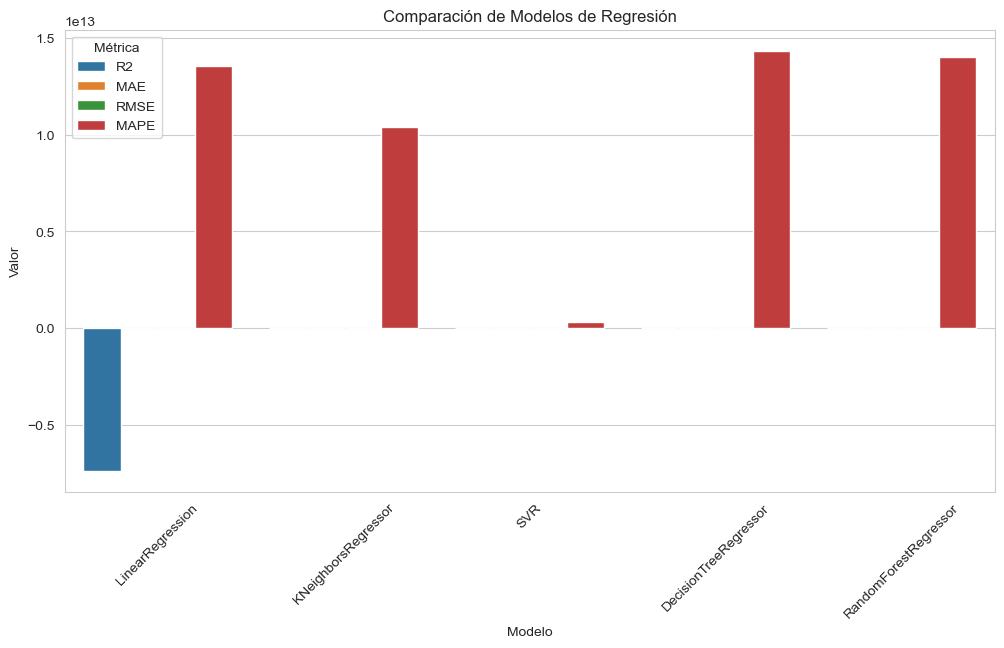

In [50]:
# Convertir los resultados a formato largo para mejor visualización
df_long = df_resultados.melt(id_vars=["Modelo"], var_name="Métrica", value_name="Valor")

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x="Modelo", y="Valor", hue="Métrica")
plt.title("Comparación de Modelos de Regresión")
plt.xticks(rotation=45)
plt.show()


#### Entrenamiento de Modelos de Clasificación Multiclase (sin Pipeline)

In [51]:
# Variables de características y variable objetivo
X_class = df.drop(columns=["room_type"])
y_class = df["room_type"]

# Dividir en entrenamiento y prueba
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

# Preprocesamiento de variables numéricas
X_train_class[numeric_cols] = imputer.fit_transform(X_train_class[numeric_cols])
X_test_class[numeric_cols] = imputer.transform(X_test_class[numeric_cols])

X_train_class[numeric_cols] = scaler.fit_transform(X_train_class[numeric_cols])
X_test_class[numeric_cols] = scaler.transform(X_test_class[numeric_cols])

# Codificación de variables categóricas
X_train_class = pd.get_dummies(X_train_class, drop_first=True)
X_test_class = pd.get_dummies(X_test_class, drop_first=True)

# Asegurarnos de que las dimensiones sean consistentes
X_train_class, X_test_class = X_train_class.align(X_test_class, join='left', axis=1, fill_value=0)


#### Modelos de Clasificación Multiclase

In [52]:
# Modelos de clasificación
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Evaluación de modelos de clasificación
df_class_results = pd.DataFrame(columns=['Modelo', 'Accuracy'])

for model_name, model in classification_models.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    
    accuracy = accuracy_score(y_test_class, y_pred_class)
    df_class_results.loc[len(df_class_results)] = [model_name, accuracy]
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_class, y_pred_class))

df_class_results.sort_values('Accuracy', ascending=False)


Logistic Regression Accuracy: 0.6002
                 precision    recall  f1-score   support

Entire home/apt       0.61      0.74      0.67      7442
     Hotel room       0.00      0.00      0.00        23
   Private room       0.58      0.46      0.51      6102
    Shared room       0.00      0.00      0.00       294

       accuracy                           0.60     13861
      macro avg       0.30      0.30      0.30     13861
   weighted avg       0.58      0.60      0.59     13861

KNN Accuracy: 0.5865
                 precision    recall  f1-score   support

Entire home/apt       0.61      0.68      0.65      7442
     Hotel room       0.00      0.00      0.00        23
   Private room       0.55      0.50      0.52      6102
    Shared room       0.20      0.00      0.01       294

       accuracy                           0.59     13861
      macro avg       0.34      0.30      0.29     13861
   weighted avg       0.57      0.59      0.58     13861

Decision Tree Accuracy: 

Modelo  Accuracy
3        Random Forest  0.704855
2        Decision Tree  0.635308
0  Logistic Regression  0.600245
1                  KNN  0.586538
4                  SVM  0.536902

#### Visualización de Resultados de Clasificación

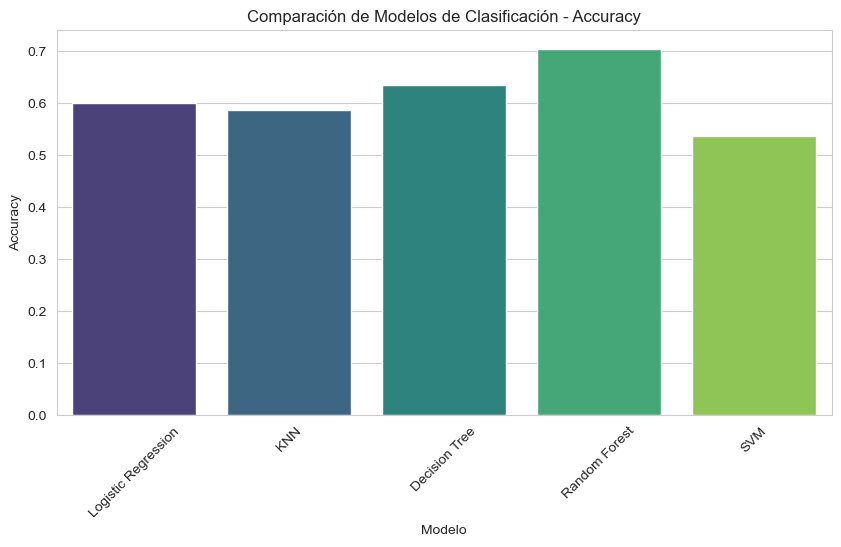

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_class_results, x='Modelo', y='Accuracy', palette="viridis")
plt.title("Comparación de Modelos de Clasificación - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


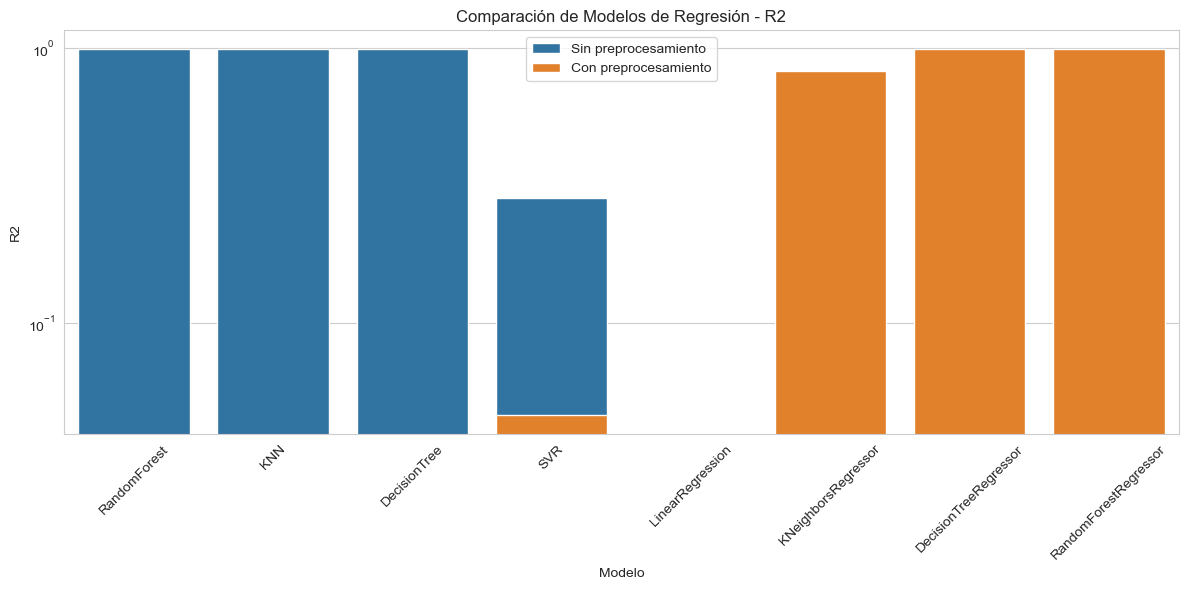

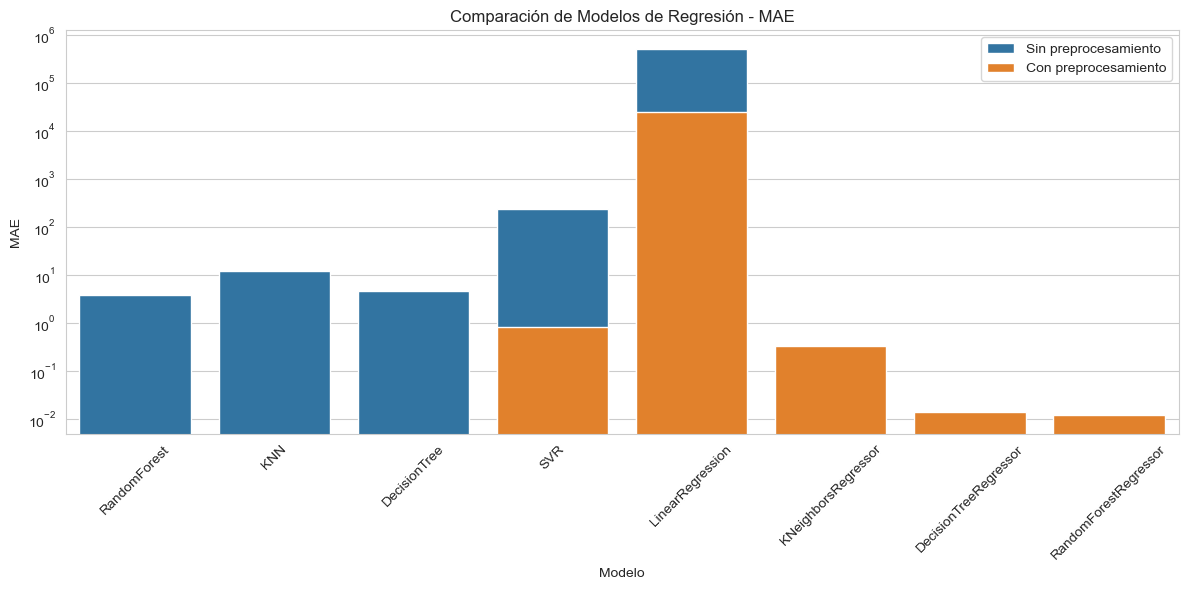

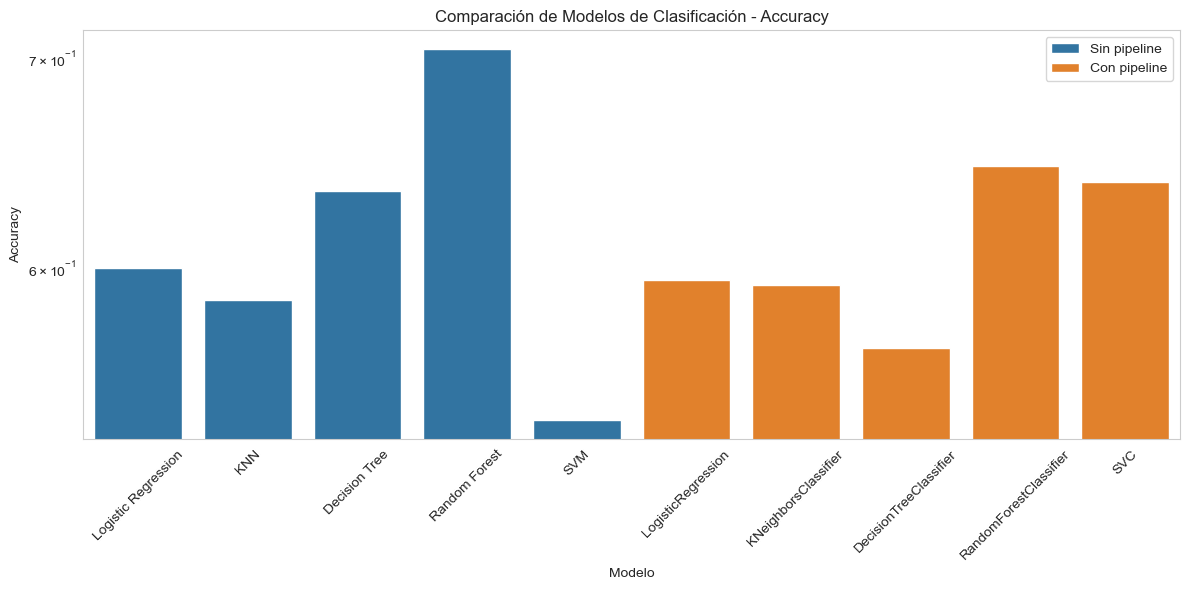

In [54]:
# Regresión
resultados_regresion = {
    "Sin preprocesamiento": df_resultados_sin,
    "Con preprocesamiento": df_resultados
}

# Clasificación
resultados_clasificacion = {
    "Sin pipeline": df_class_results,
    "Con pipeline": pd.DataFrame(results, columns=["Modelo", "Accuracy"])  # Convertir a DataFrame
}

def crear_grafico_comparativo(resultados, titulo, metrica):
    plt.figure(figsize=(12, 6))
    ax = plt.gca()  # Obtener el eje actual
    for nombre, df_resultados in resultados.items():
        sns.barplot(x="Modelo", y=metrica, data=df_resultados, label=nombre)
    plt.title(titulo)
    plt.ylabel(metrica)
    plt.xticks(rotation=45)
    plt.legend()
    
    # Escala logarítmica para el eje Y
    ax.set_yscale('log')
    
    plt.tight_layout()
    plt.show()
# Gráfico comparativo para regresión (R2)
crear_grafico_comparativo(resultados_regresion, "Comparación de Modelos de Regresión - R2", "R2")

# Gráfico comparativo para regresión (MAE)
crear_grafico_comparativo(resultados_regresion, "Comparación de Modelos de Regresión - MAE", "MAE")

# Gráfico comparativo para clasificación (Accuracy)
crear_grafico_comparativo(resultados_clasificacion, "Comparación de Modelos de Clasificación - Accuracy", "Accuracy")


## Análisis de los gráficos comparativos:
#### 1.	Modelos de Regresión:
##### o	Gráfico R2: Este gráfico muestra el coeficiente de determinación (R2) para cada modelo de regresión, tanto con preprocesamiento como sin él. El R2 mide la proporción de varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de R2 más cercano a 1 indica un mejor ajuste del modelo a los datos. Los modelo de regregresión y de clasificación, muestran valores muy cercanos e iguales al uno. Por lo que ajustan bien los modelos, destacando los de RandomForest.
##### o	Gráfico MAE: Este gráfico muestra el error absoluto medio (MAE) para cada modelo de regresión. El MAE mide la diferencia promedio entre las predicciones del modelo y los valores reales. Un valor de MAE más bajo indica una mayor precisión del modelo. Los modelos con preprocesamiento muestran valores mas cercanos al cero por lo que ajustan mejor el modelo RandomForestRegressor.
##### o	Análisis: Al comparar los gráficos R2 y MAE, busca modelos que combinen un R2 alto con un MAE bajo. Esto sugiere que el modelo es capaz de explicar una gran parte de la varianza en la variable dependiente y, al mismo tiempo, realiza predicciones precisas. El modelo de RandonForest se ajusta mejor.
#### 2.	Modelos de Clasificación:
##### o	Gráfico Accuracy: Este gráfico muestra la precisión (accuracy) para cada modelo de clasificación, tanto con pipeline como sin él. La precisión mide el porcentaje de predicciones correctas del modelo. Un valor de precisión más alto indica un mejor rendimiento del modelo. El modelo que mejor se ajusta sin preprocesado y con preprocesado es el RandomForest y RandomForestClassifier
##### o	Análisis: Al analizar el gráfico de precisión, busca modelos que tengan una precisión consistentemente alta en diferentes conjuntos de datos o configuraciones. Esto sugiere que el modelo es robusto y generaliza bien a datos no vistos.

##### Modelos con preprocesamiento/pipeline: En general, los modelos que utilizan preprocesamiento de datos o pipelines tienden a ofrecer un mejor rendimiento en comparación con ##### los modelos que no lo hacen. Esto se debe a que el preprocesamiento ayuda a limpiar, transformar y preparar los datos para el modelado, lo que puede mejorar la precisión y ##### la capacidad de generalización de los modelos.
